In [3]:
import json
import os

simulations = []

simulations_path = "./data/simulations/"
simulations_dirs = os.listdir(simulations_path)
for dir in simulations_dirs:
    simulation = {
        "data": None,
        "generations": [],
    }

    simulation_path = simulations_path + dir
    generations_path = simulation_path + "/generations"

    simulation_filename = "simulation_data.json"
    simulation_path = simulation_path + "/" + simulation_filename
    simulation_file = open(simulation_path)
    simulation_data = json.load(simulation_file)
    simulation_file.close()

    if simulation_data["evolution"]["mutation_chance"] != 0.7:
        continue

    generations_dir = os.listdir(generations_path)
    generations_dir.sort(key=lambda x: int(x.split(".")[0]))
    for generation_filename in generations_dir:
        generation_path = generations_path + "/" + generation_filename
        generation_file = open(generation_path)
        generation_data = json.load(generation_file)
        generation_file.close()
        simulation["generations"].append(generation_data)

    
    # check simulation_data["research"]["brain_setup"] exists
    if "brain_setup" not in simulation_data["research"]:
        simulation_data["research"]["brain_setup"] = None
    simulation["data"] = simulation_data
    
    if len(simulation["generations"]) > 5:
        simulations.append(simulation)

mlp[24, 5, 10]b0hl2cr0.4mc0.7
mlp[24, 5, 10]b1hl1cr0.4mc0.7
mlp[24, 5, 10]b1hl2cr0.4mc0.7
mlp[24, 5, 10]b2hl1cr0.4mc0.7
mlp[24, 5, 10]b2hl2cr0.4mc0.7
mlp[24, 7, 3, 10]b0hl1cr0.4mc0.7
mlp[24, 7, 3, 10]b0hl2cr0.4mc0.7
mlp[24, 7, 3, 10]b1hl1cr0.4mc0.7
mlp[24, 7, 3, 10]b1hl2cr0.4mc0.7
mlp[24, 7, 3, 10]b2hl1cr0.4mc0.7
mlp[24, 7, 3, 10]b2hl2cr0.4mc0.7
mlp[24, 10, 10]b0hl1cr0.4mc0.7
mlp[24, 10, 10]b0hl2cr0.4mc0.7
mlp[24, 10, 10]b1hl1cr0.4mc0.7
mlp[24, 10, 10]b1hl2cr0.4mc0.7
mlp[24, 10, 10]b2hl1cr0.4mc0.7
mlp[24, 10, 10]b2hl2cr0.4mc0.7
mlp[24, 20, 10]b0hl1cr0.4mc0.7
mlp[24, 20, 10]b0hl2cr0.4mc0.7
mlp[24, 20, 10]b1hl1cr0.4mc0.7


C:\Users\Vectro\AppData\Local\Temp\ipykernel_18220\3012024614.py:100: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  current_figure, current_axis = plt.subplots(rows,3, figsize=(15, rows*3), gridspec_kw={'height_ratios': [3,*[1]*(rows-1)]})


mlp[24, 20, 10]b1hl2cr0.4mc0.7
mlp[24, 20, 10]b2hl1cr0.4mc0.7
mlp[24, 20, 10]b2hl2cr0.4mc0.7
randomNoneb0hl1cr0.4mc0.7
randomNoneb0hl2cr0.4mc0.7
randomNoneb1hl1cr0.4mc0.7
randomNoneb1hl2cr0.4mc0.7
randomNoneb2hl1cr0.4mc0.7
randomNoneb2hl2cr0.4mc0.7


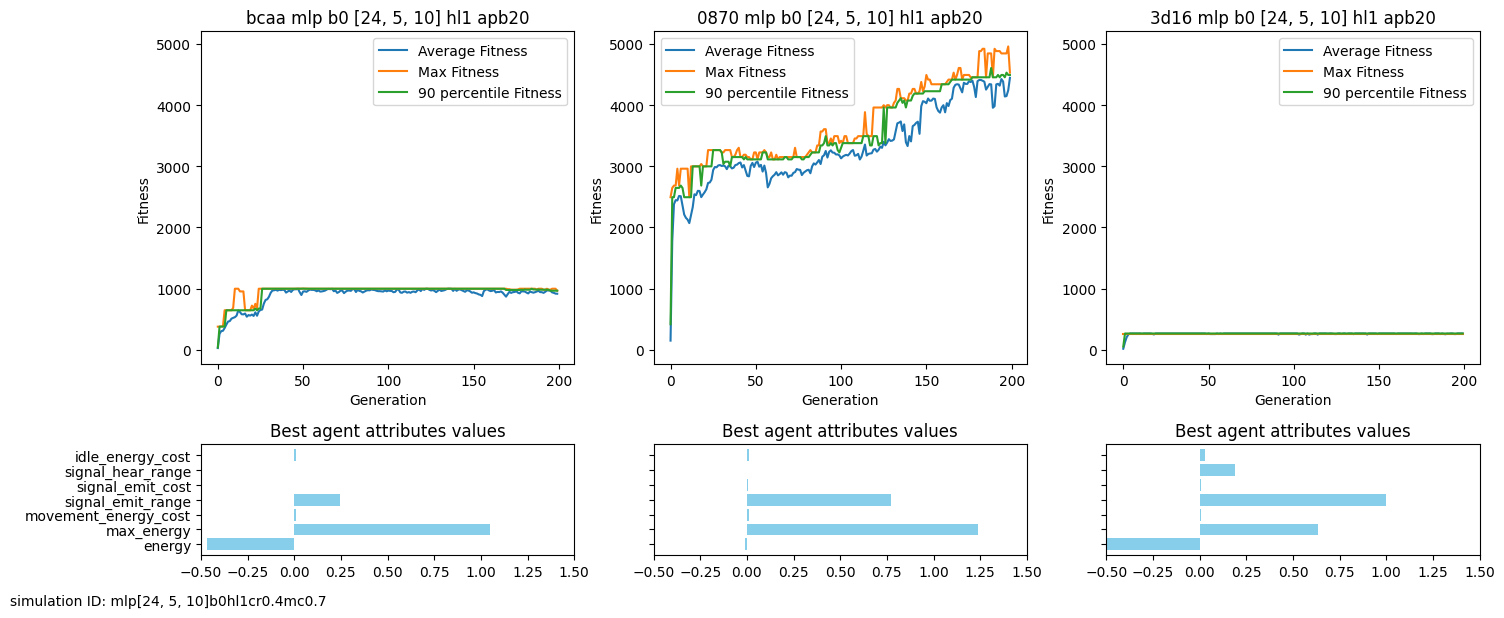

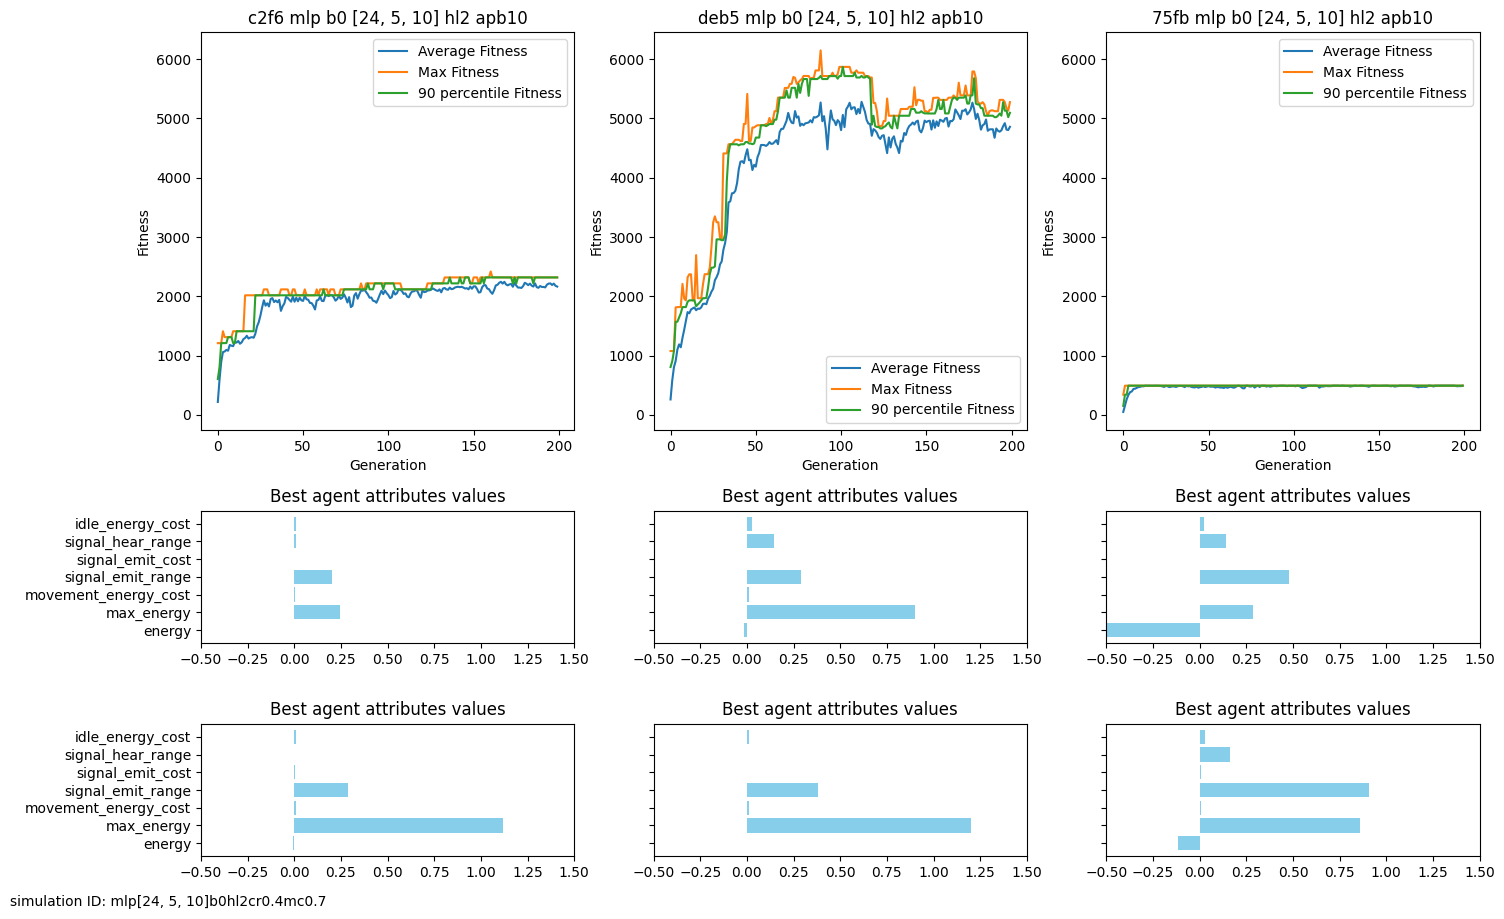

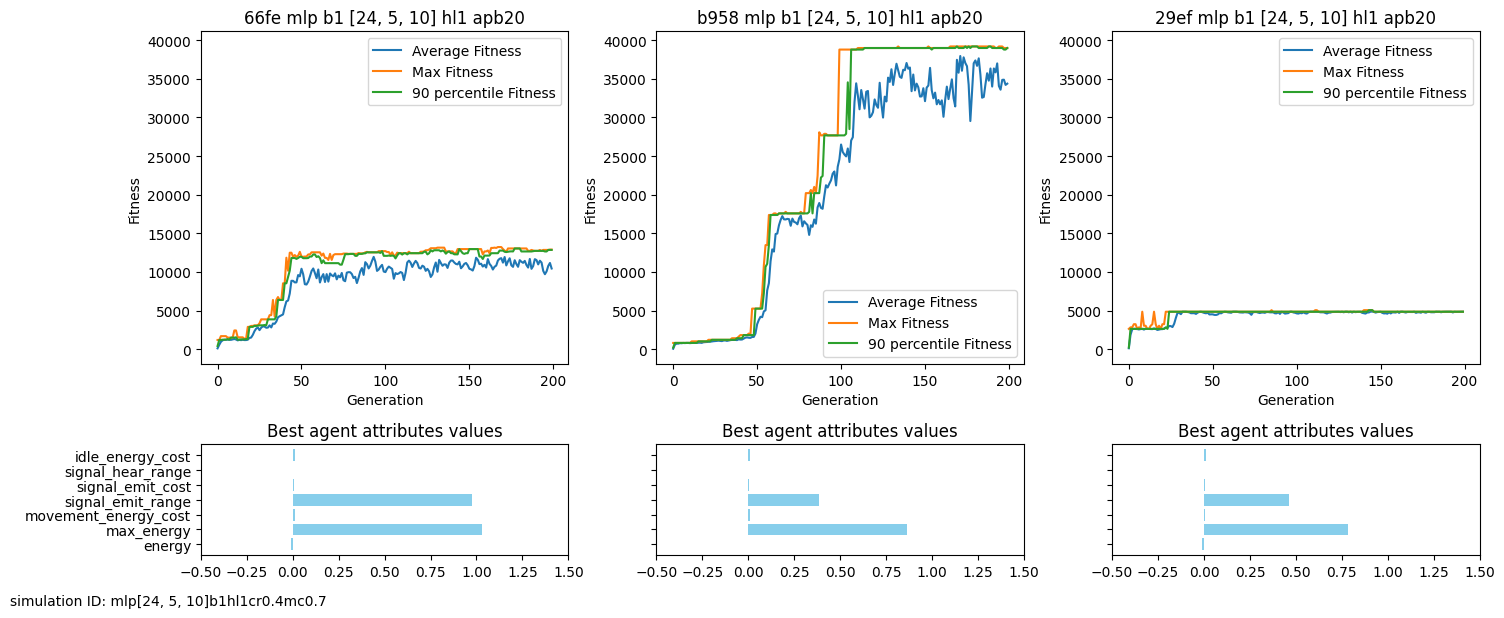

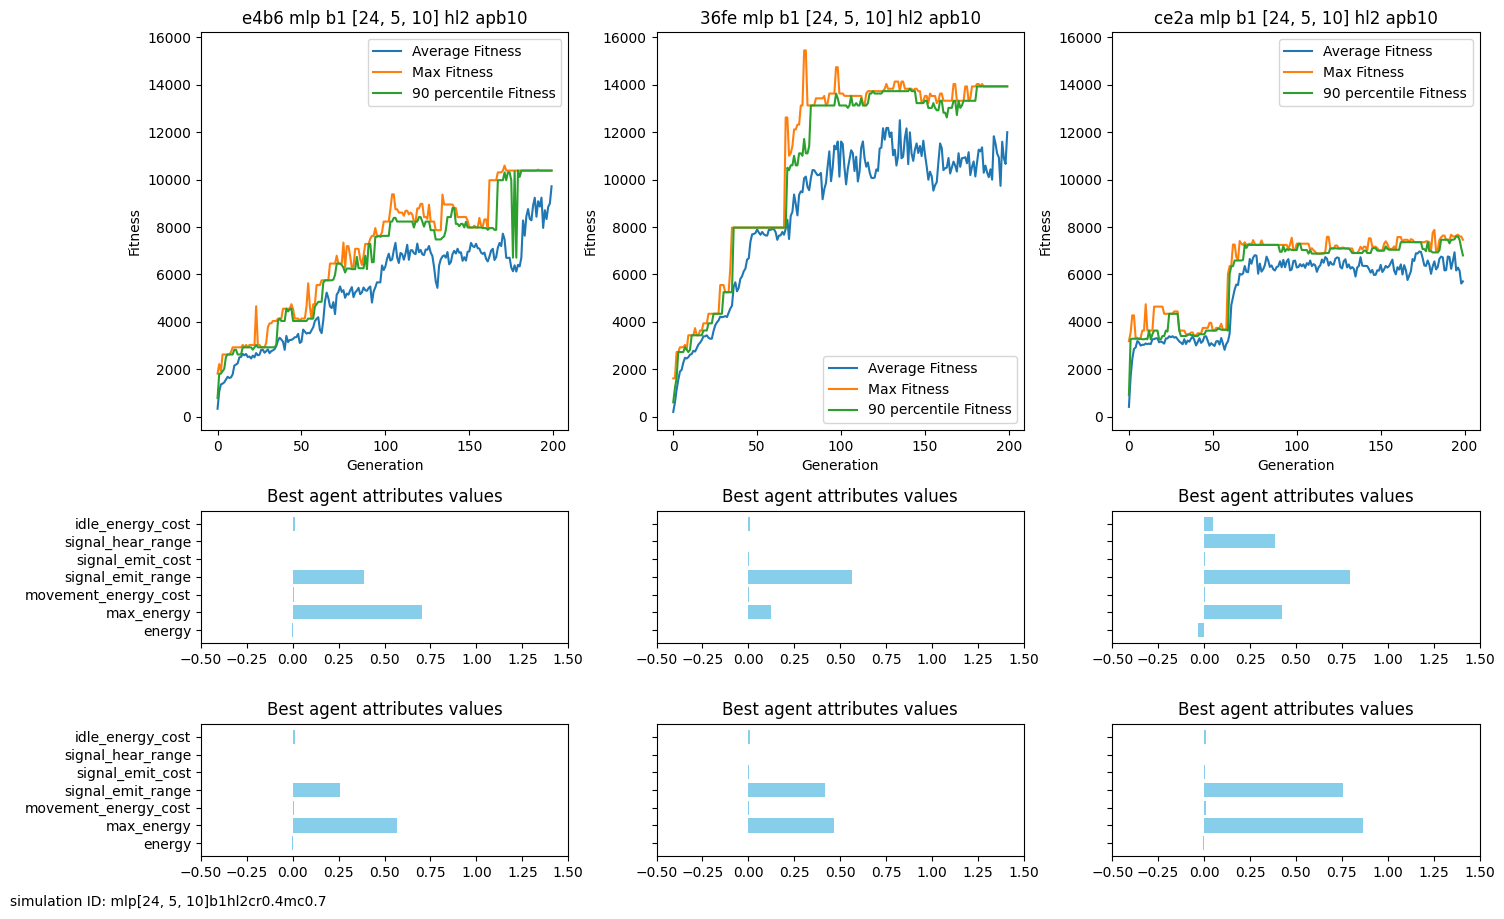

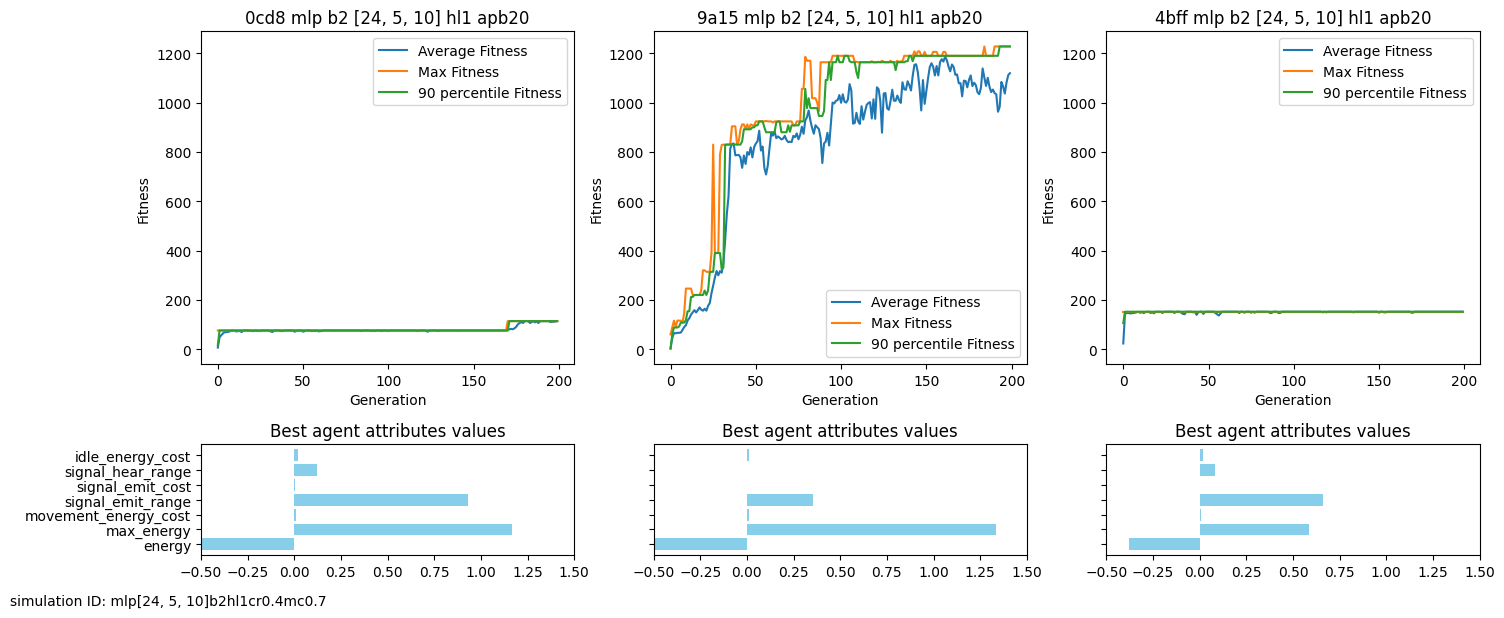

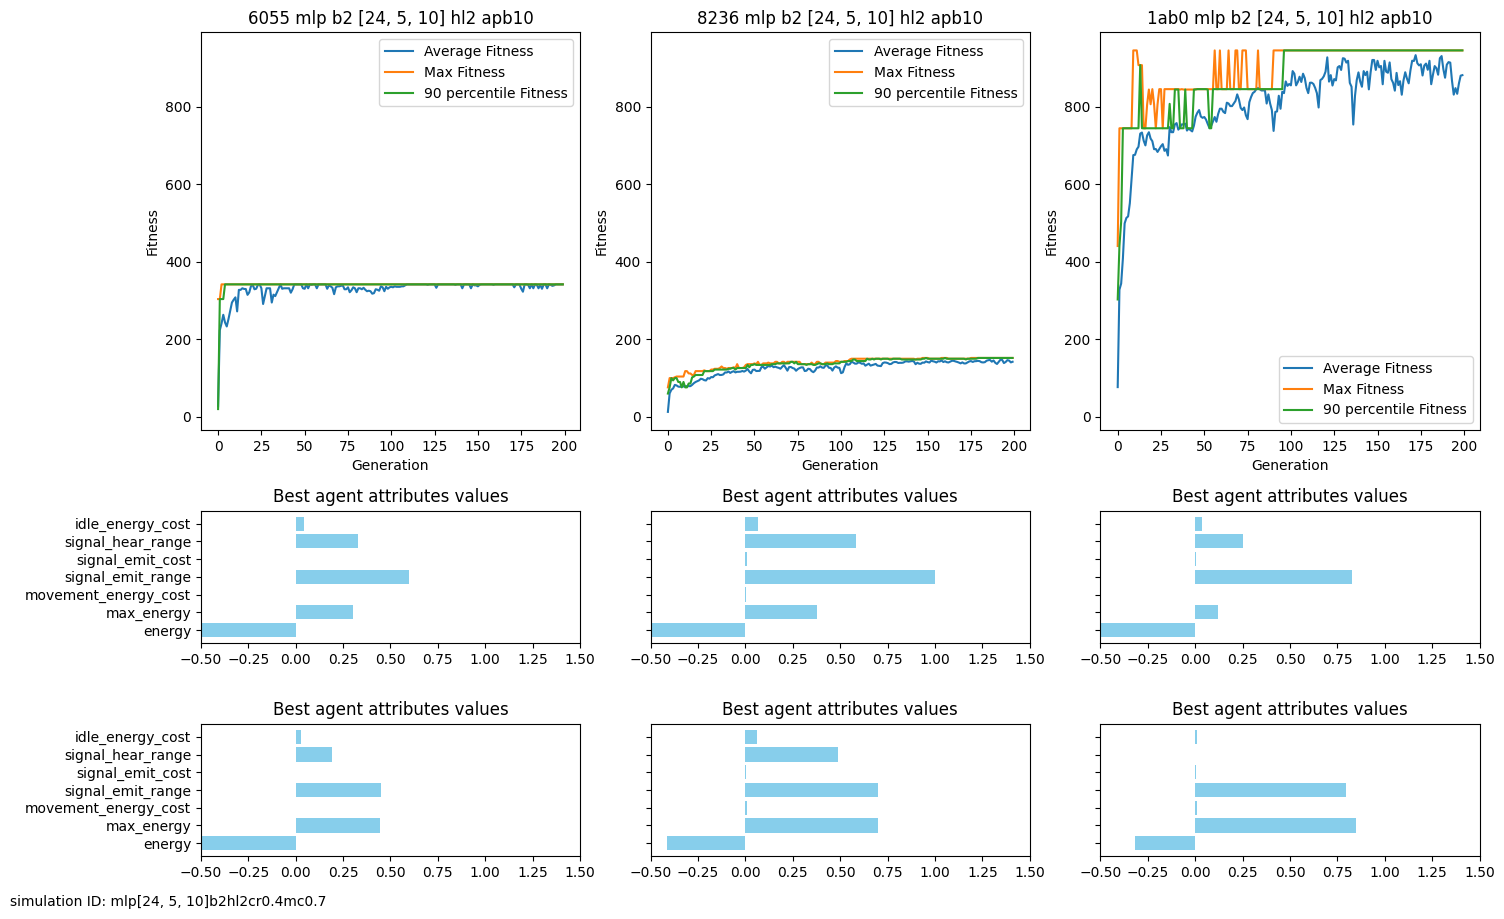

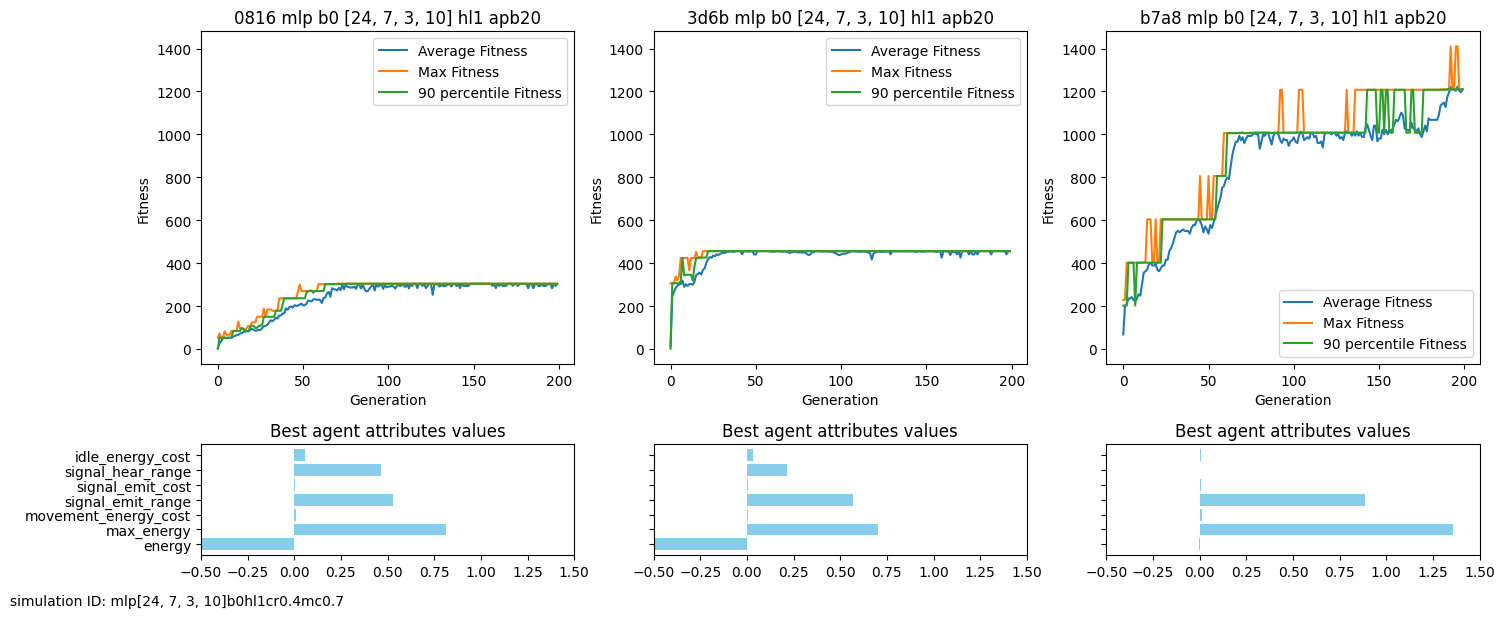

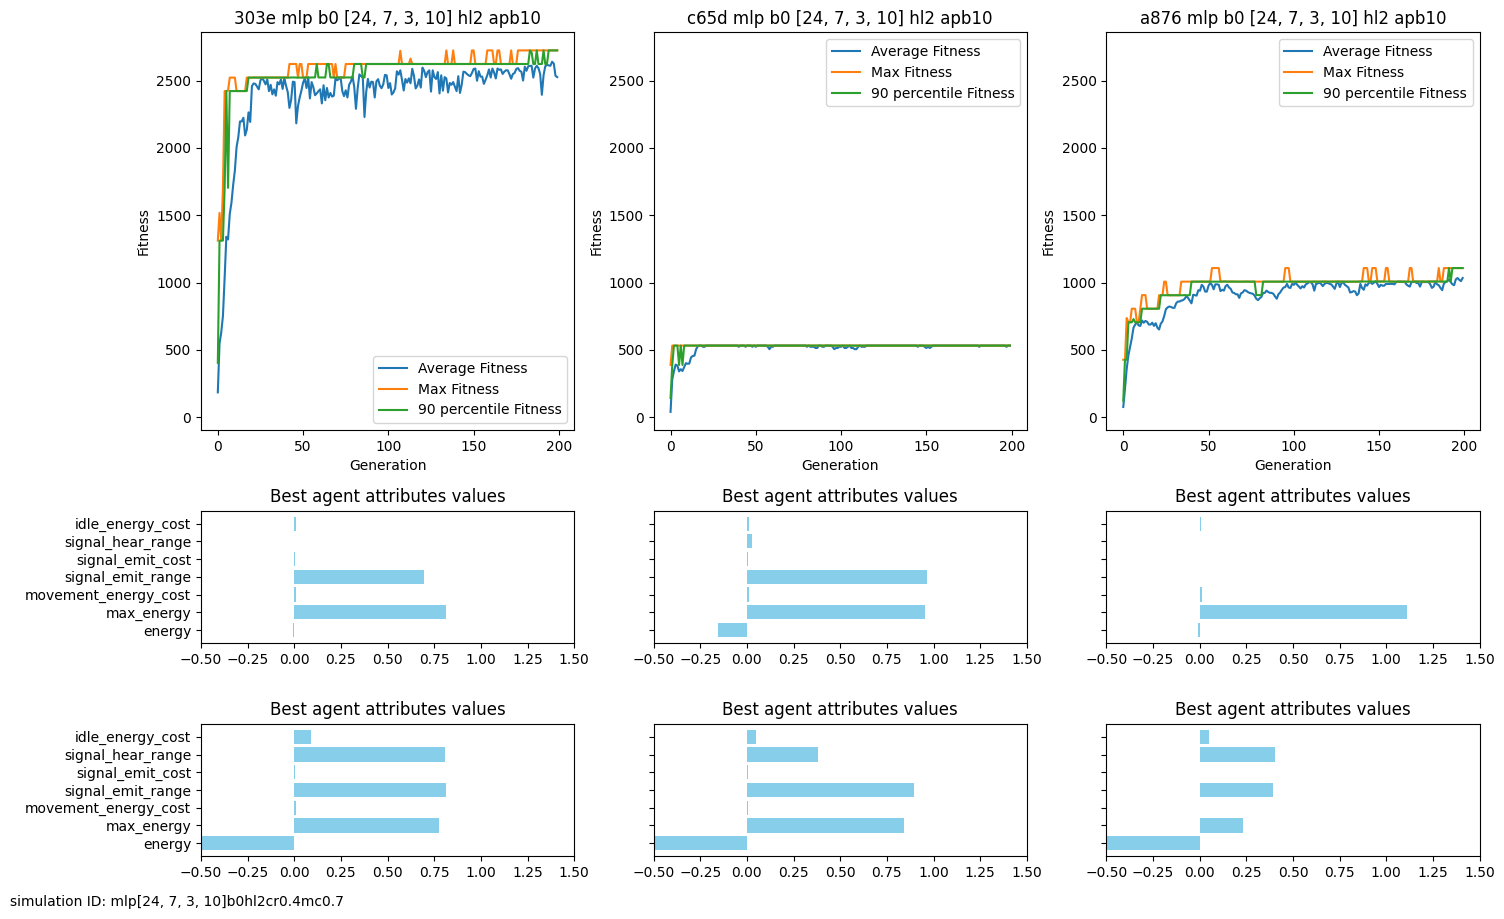

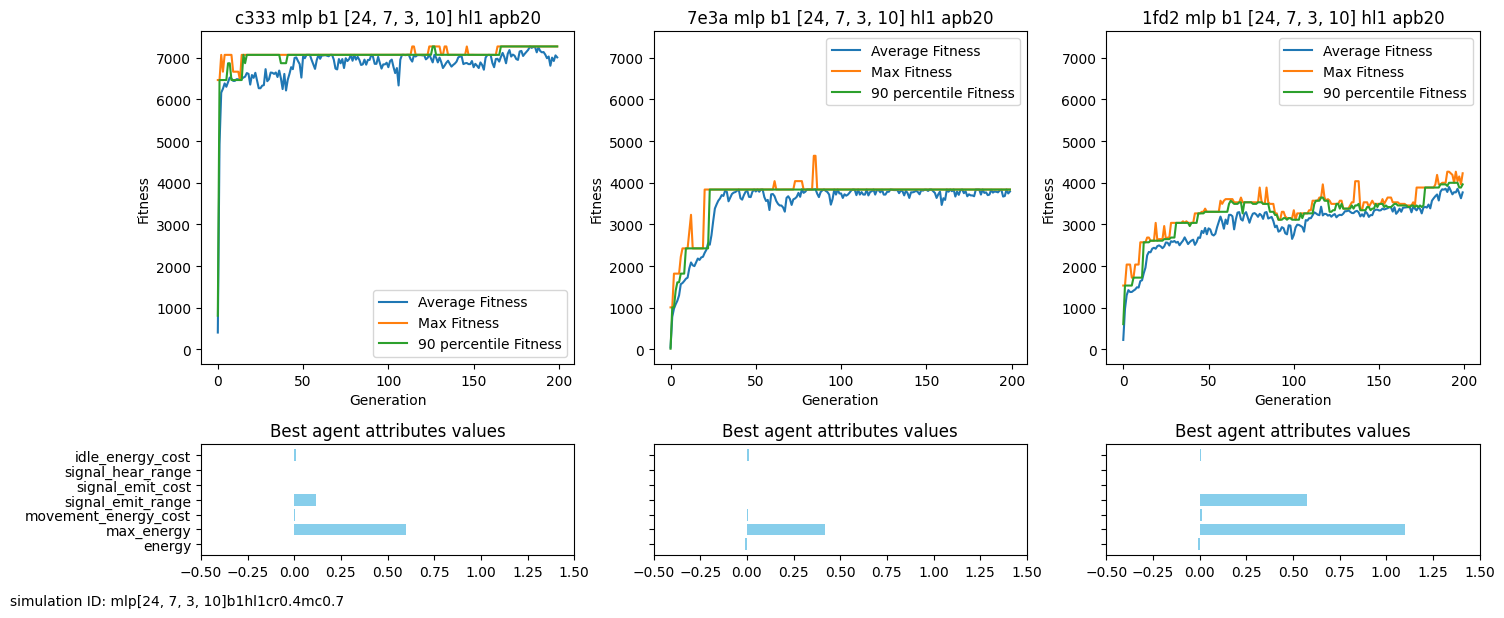

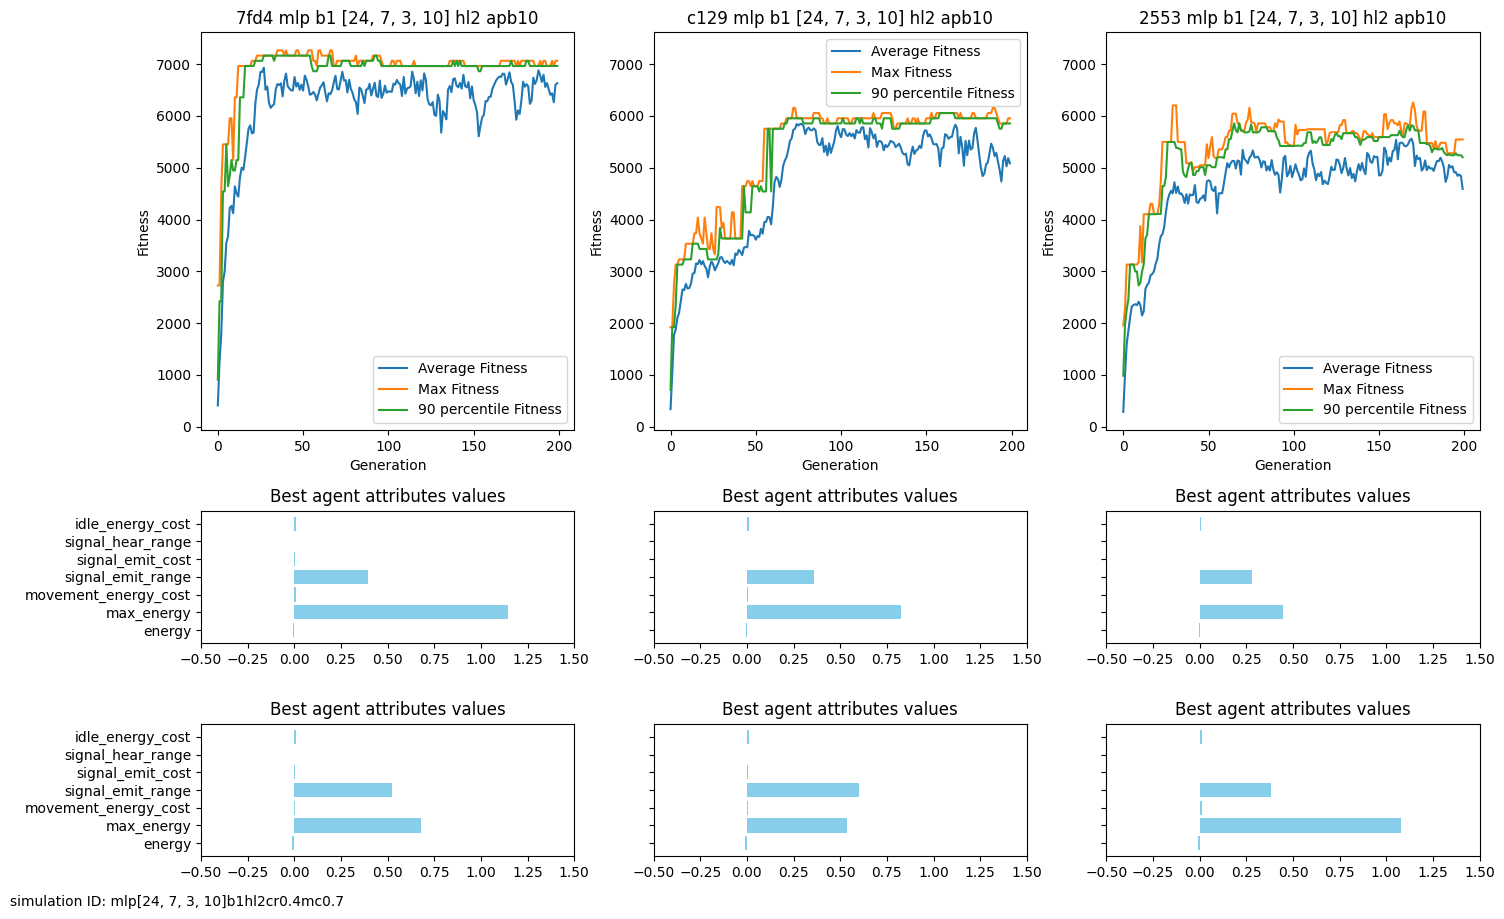

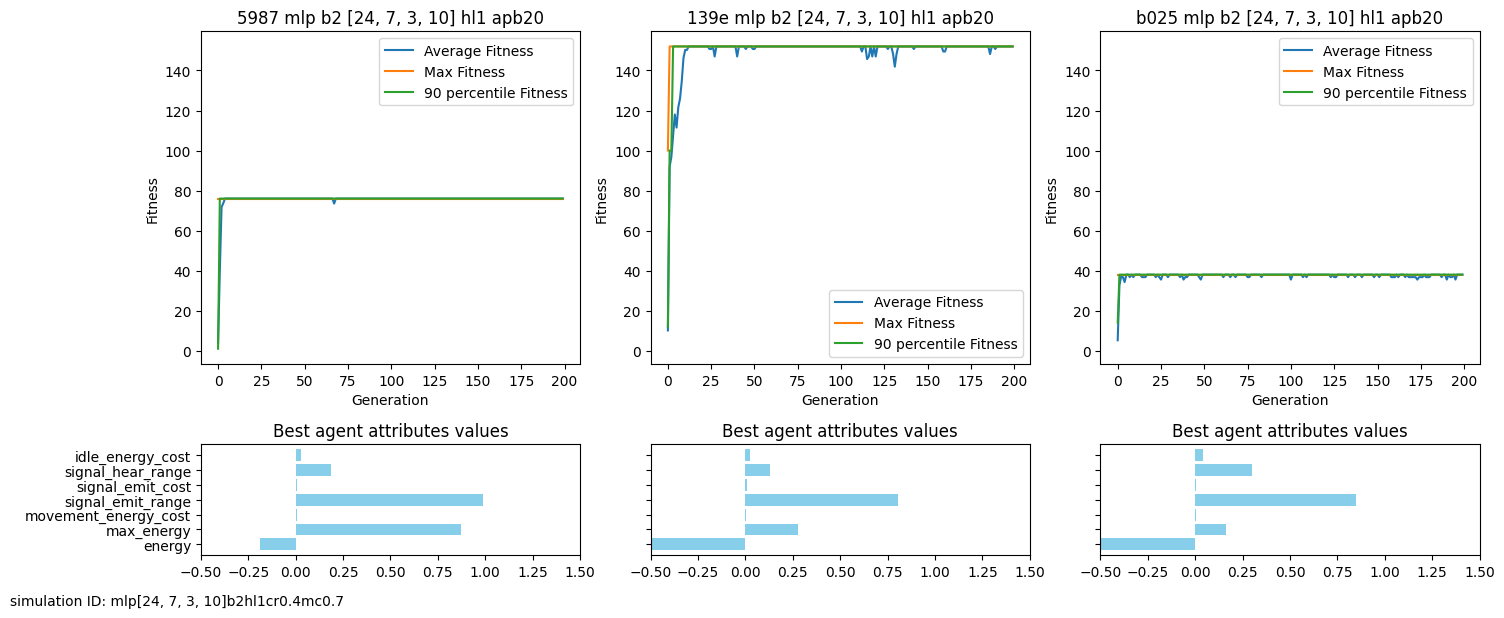

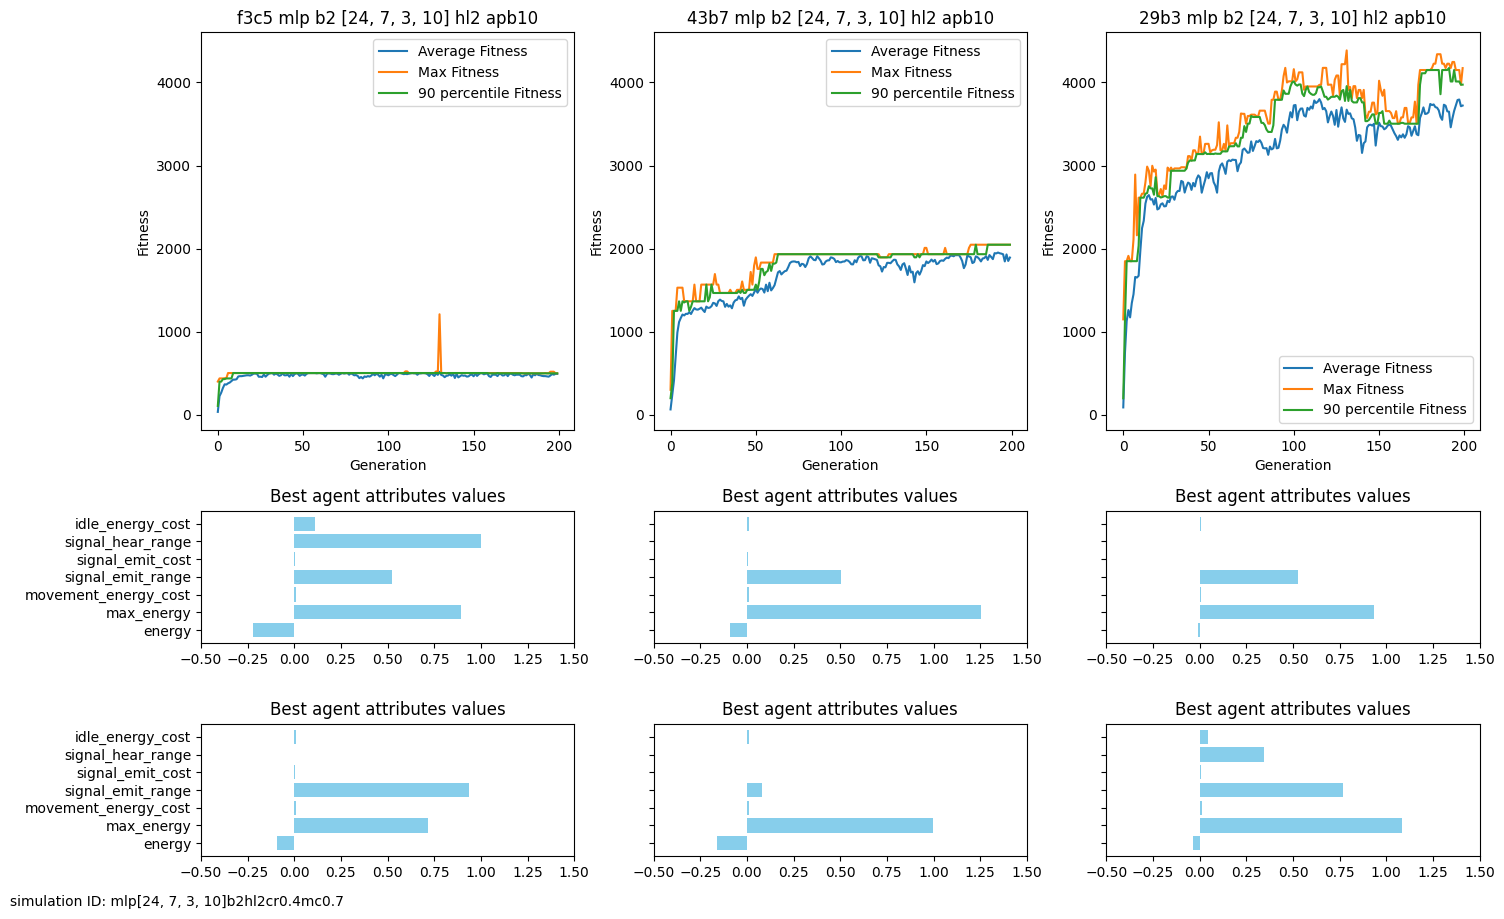

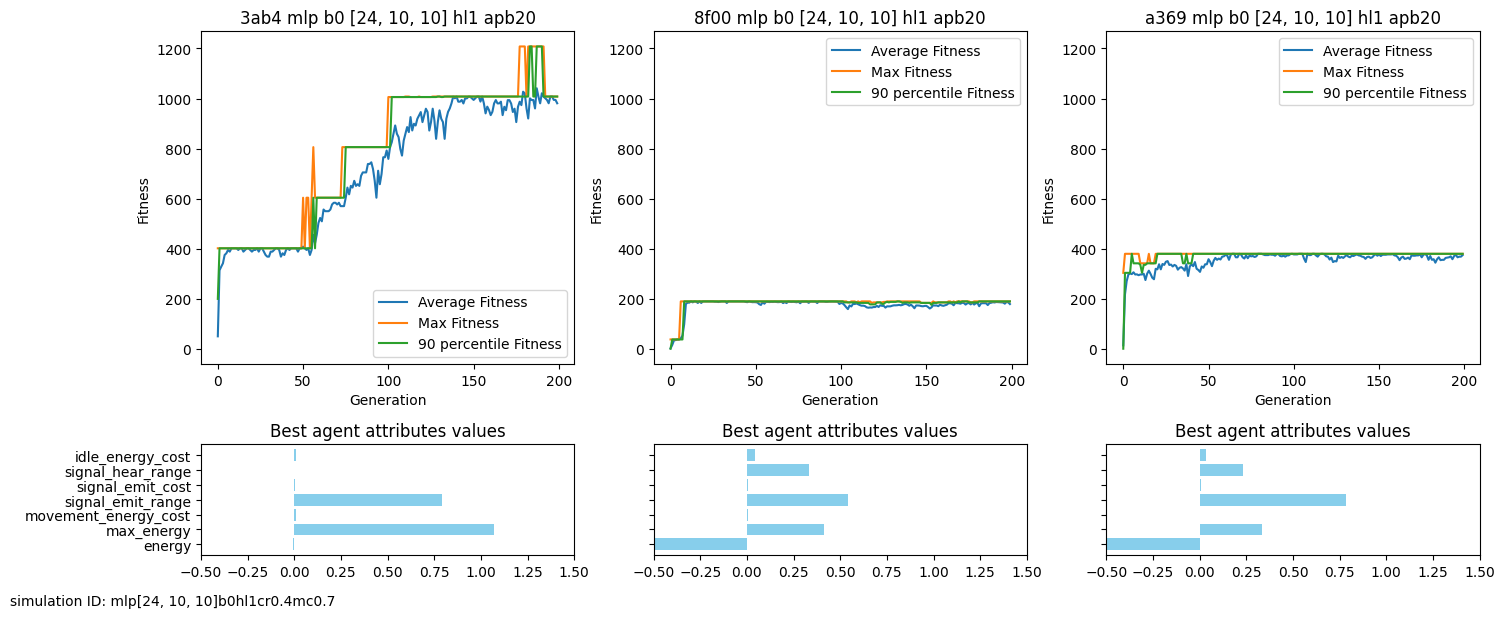

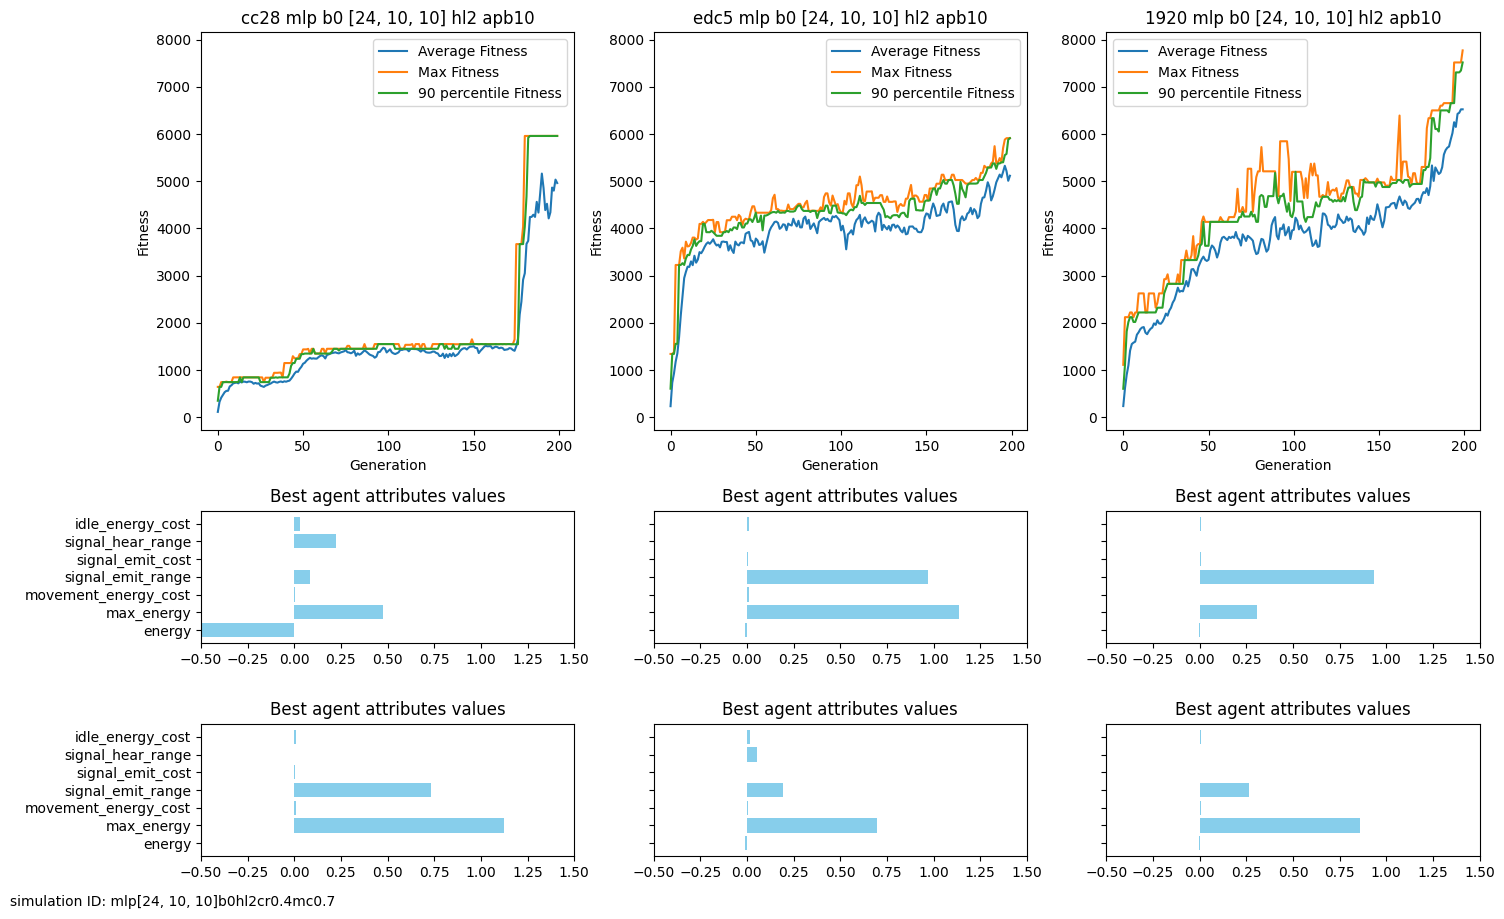

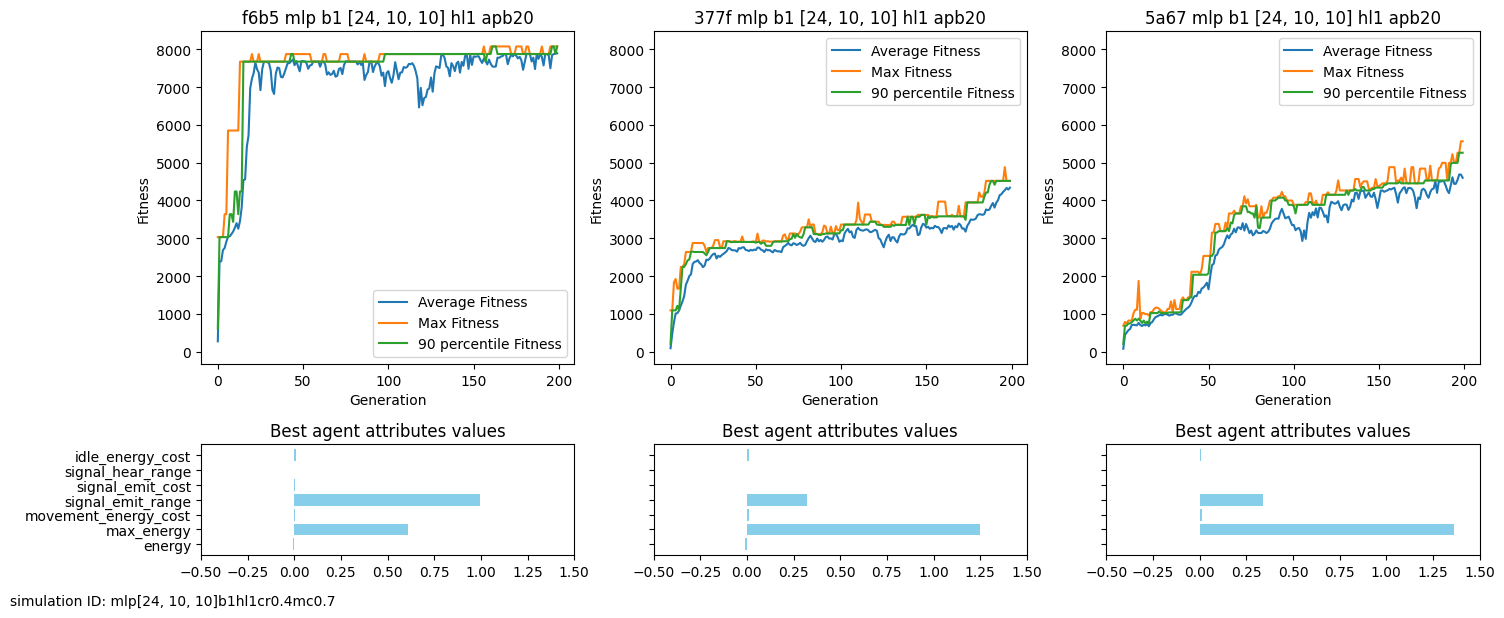

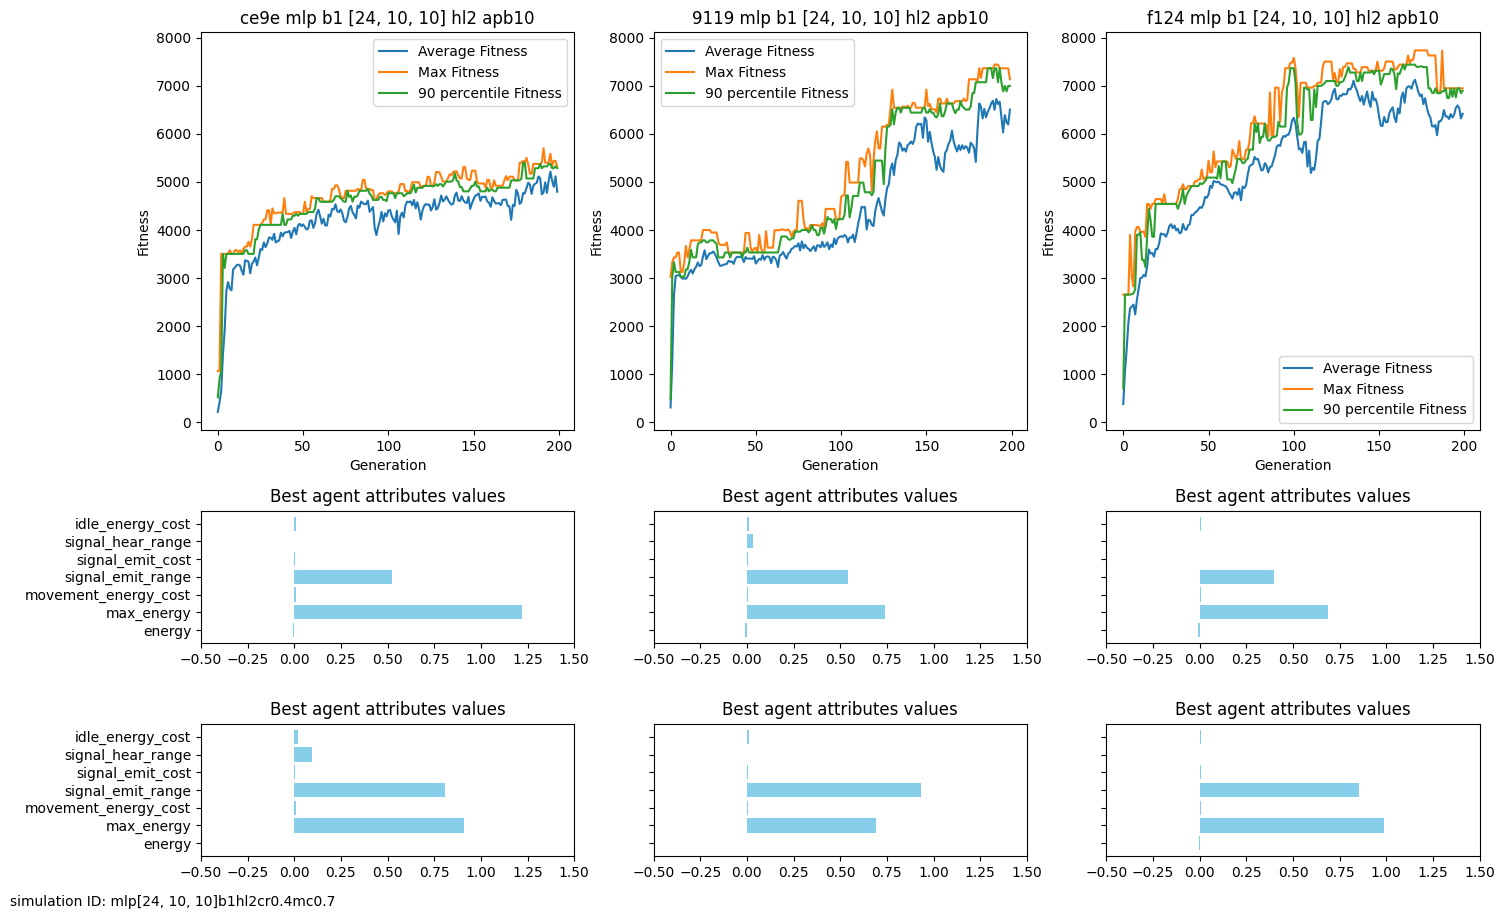

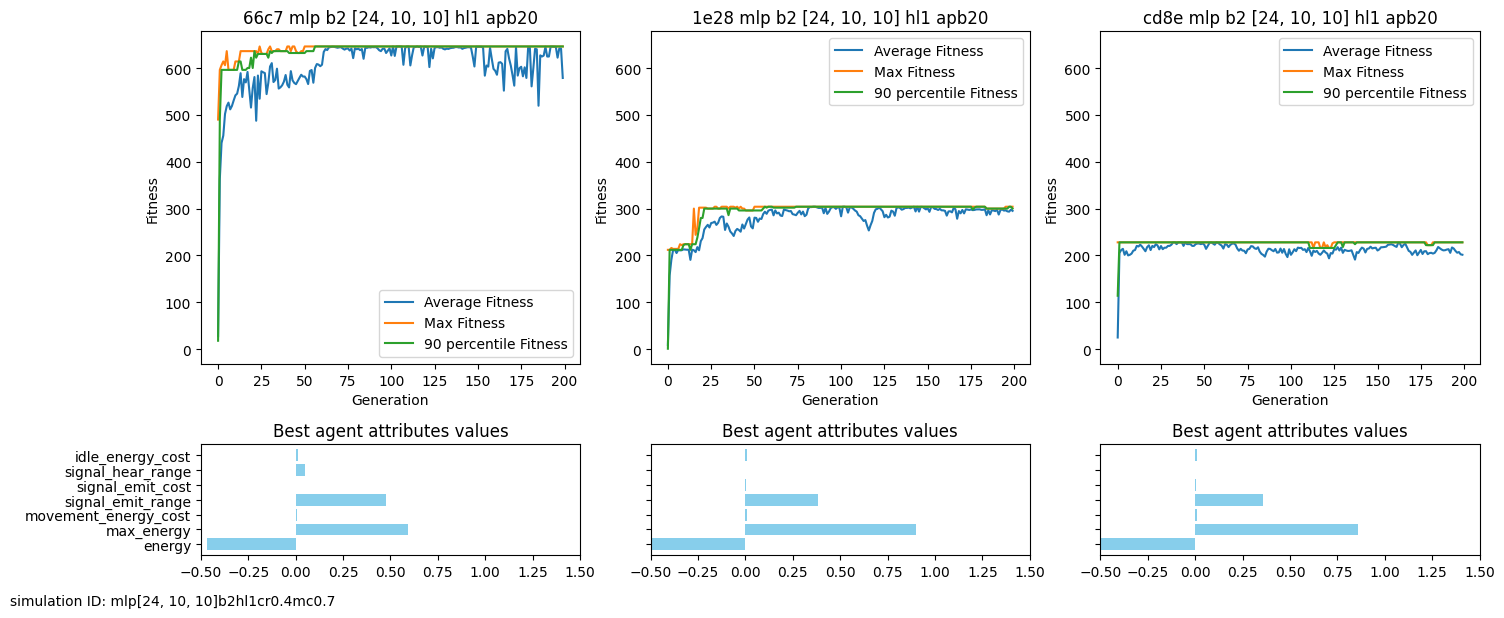

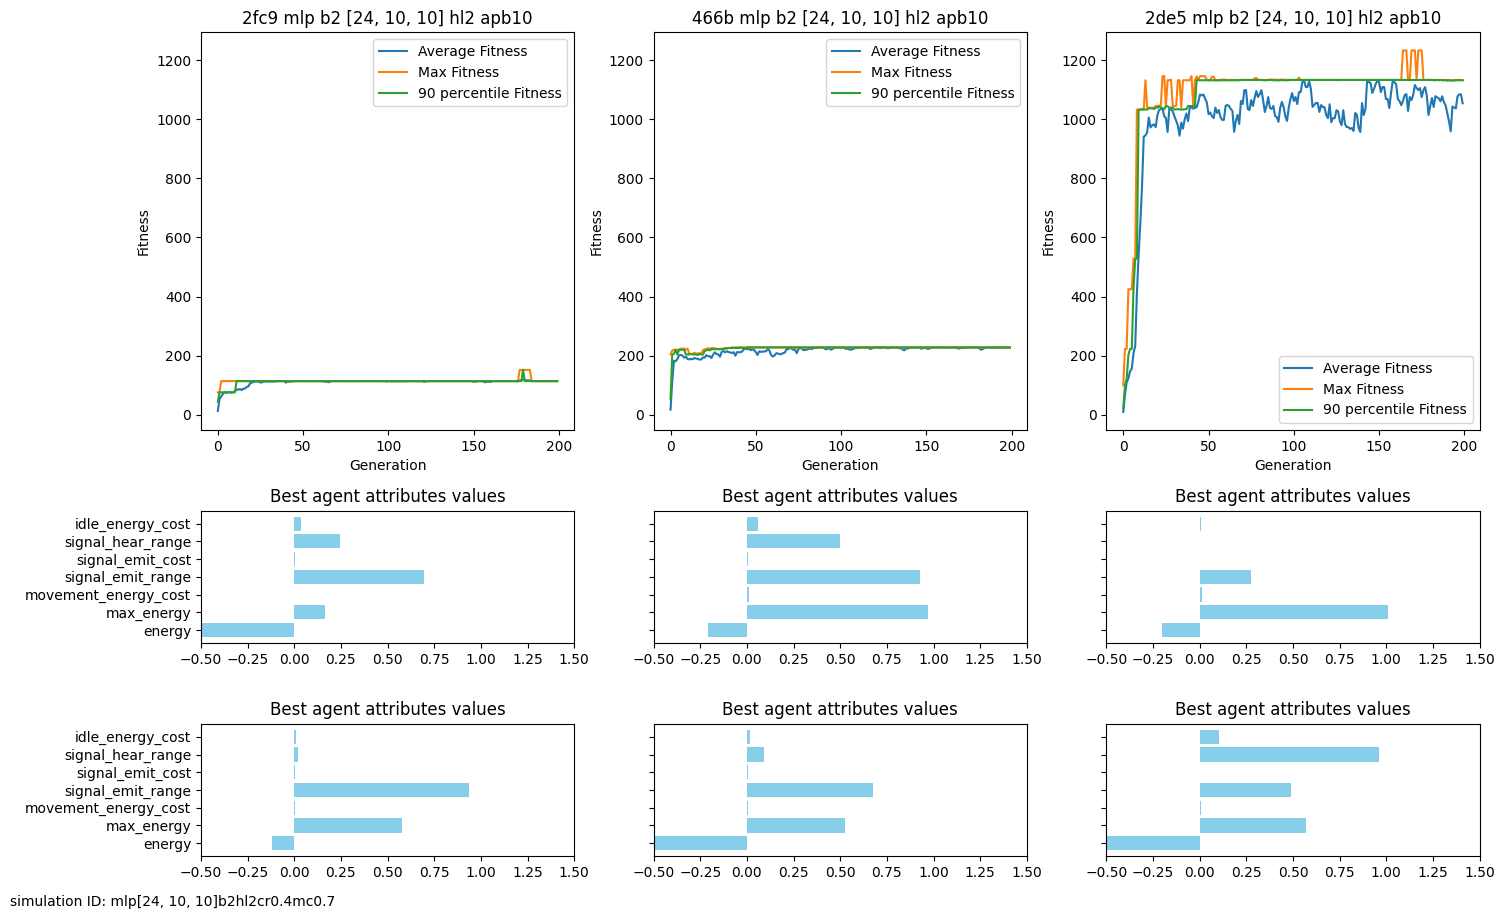

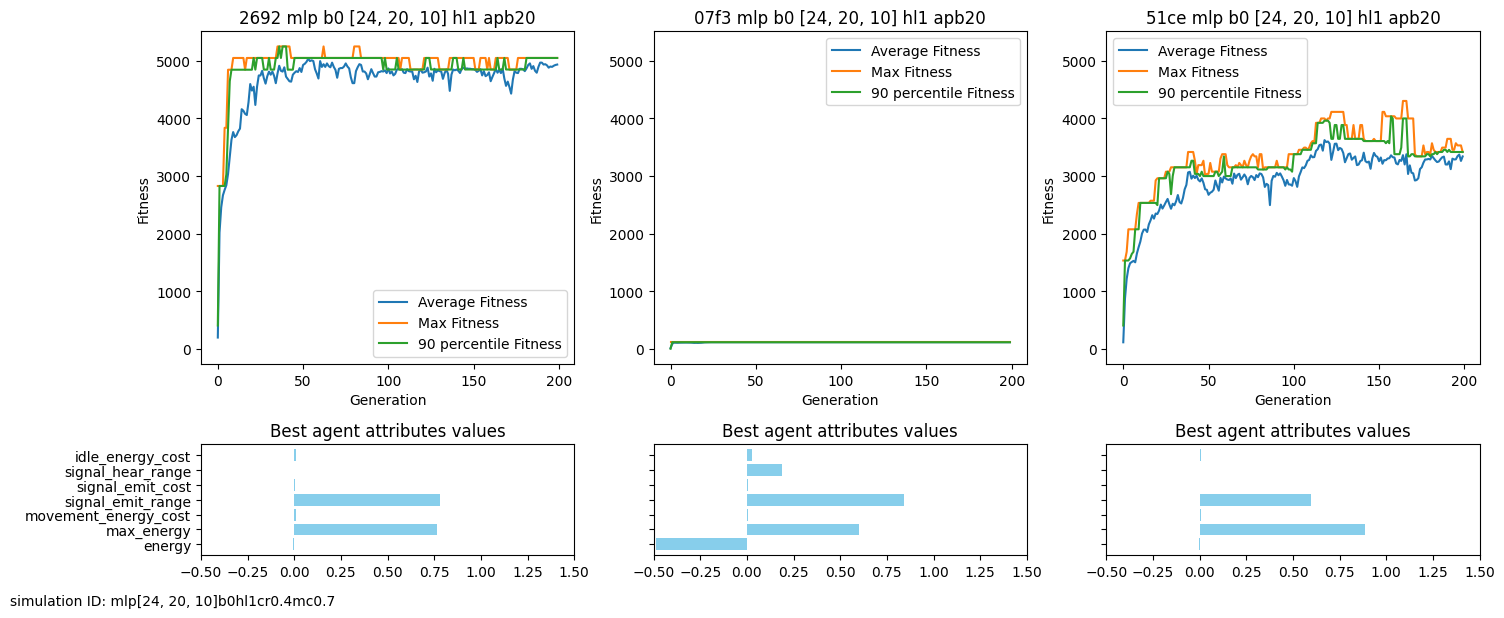

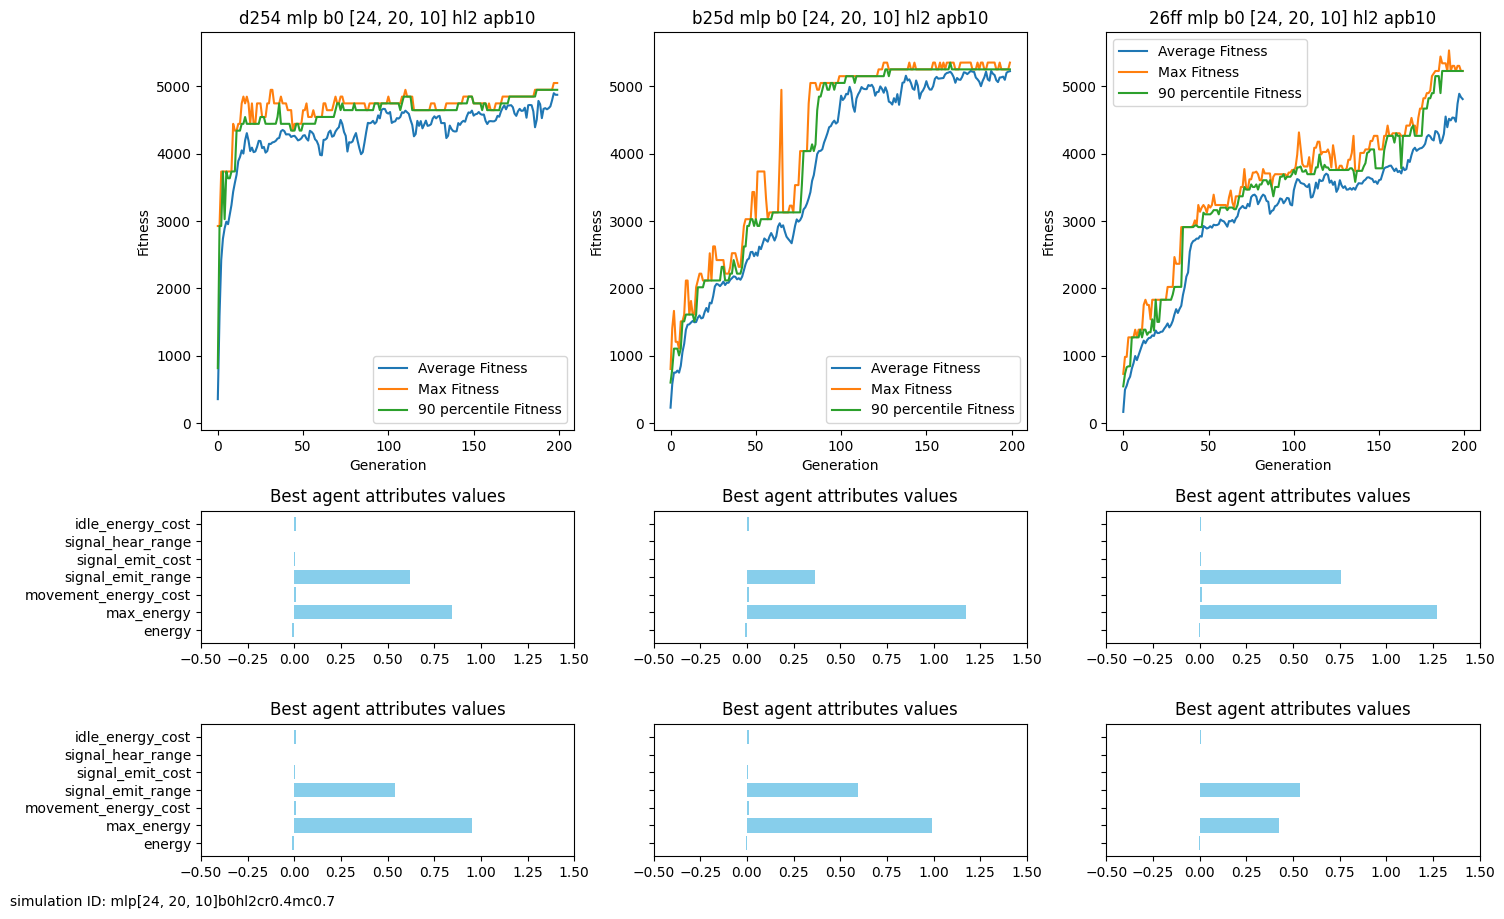

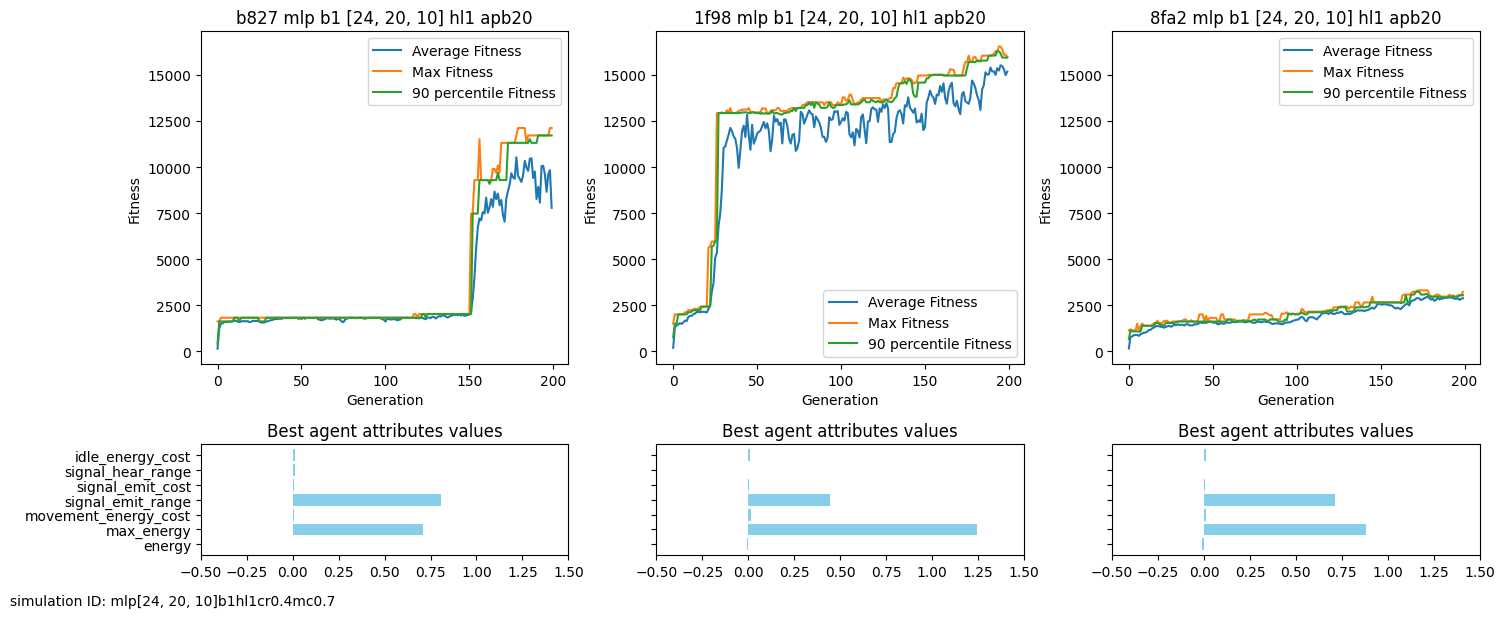

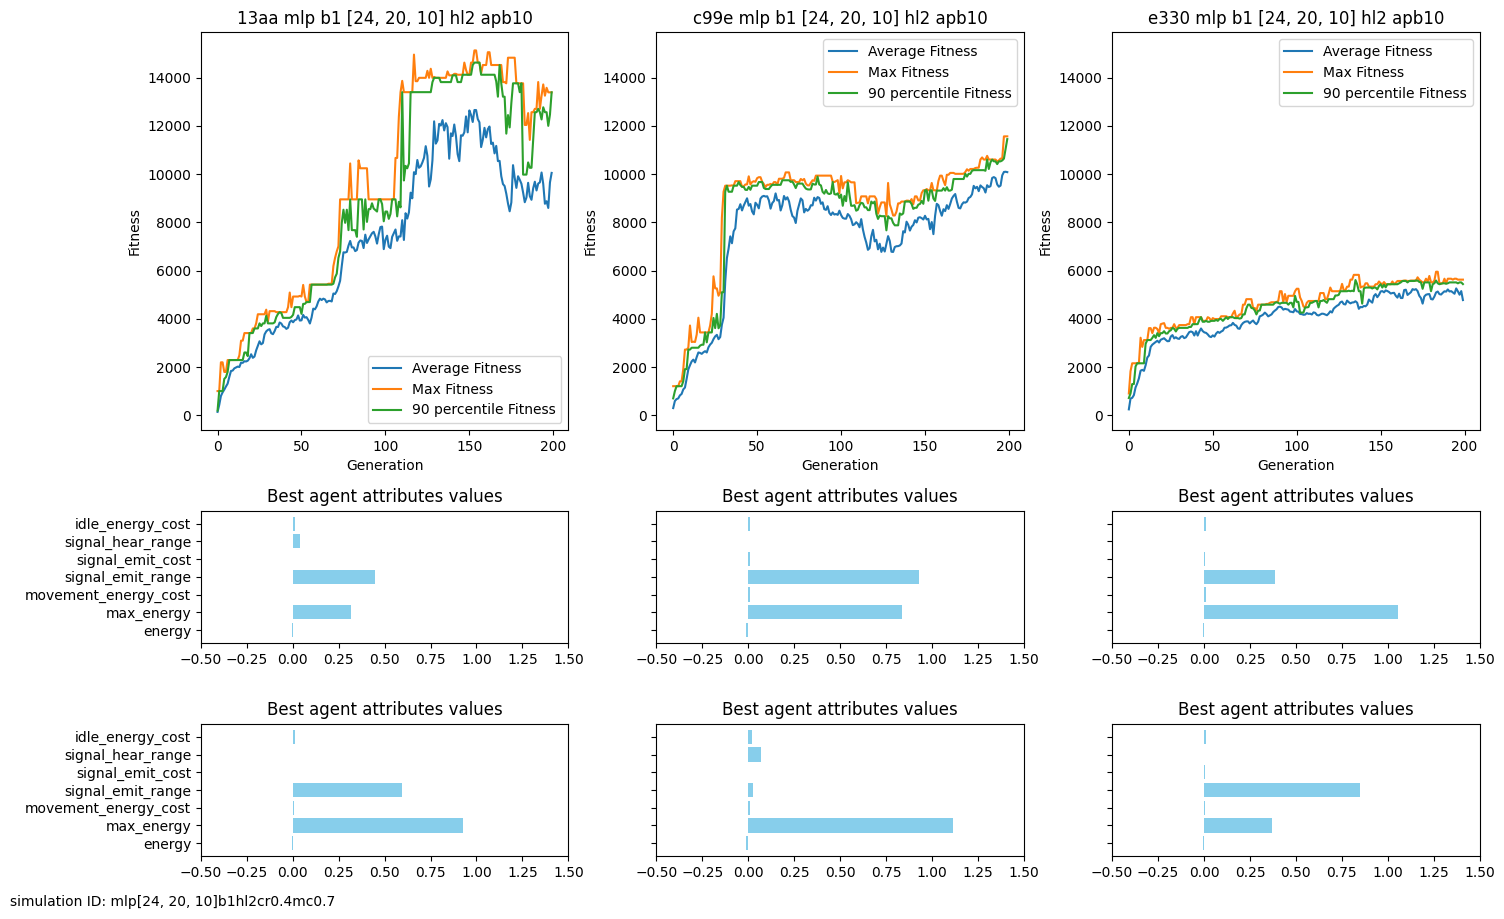

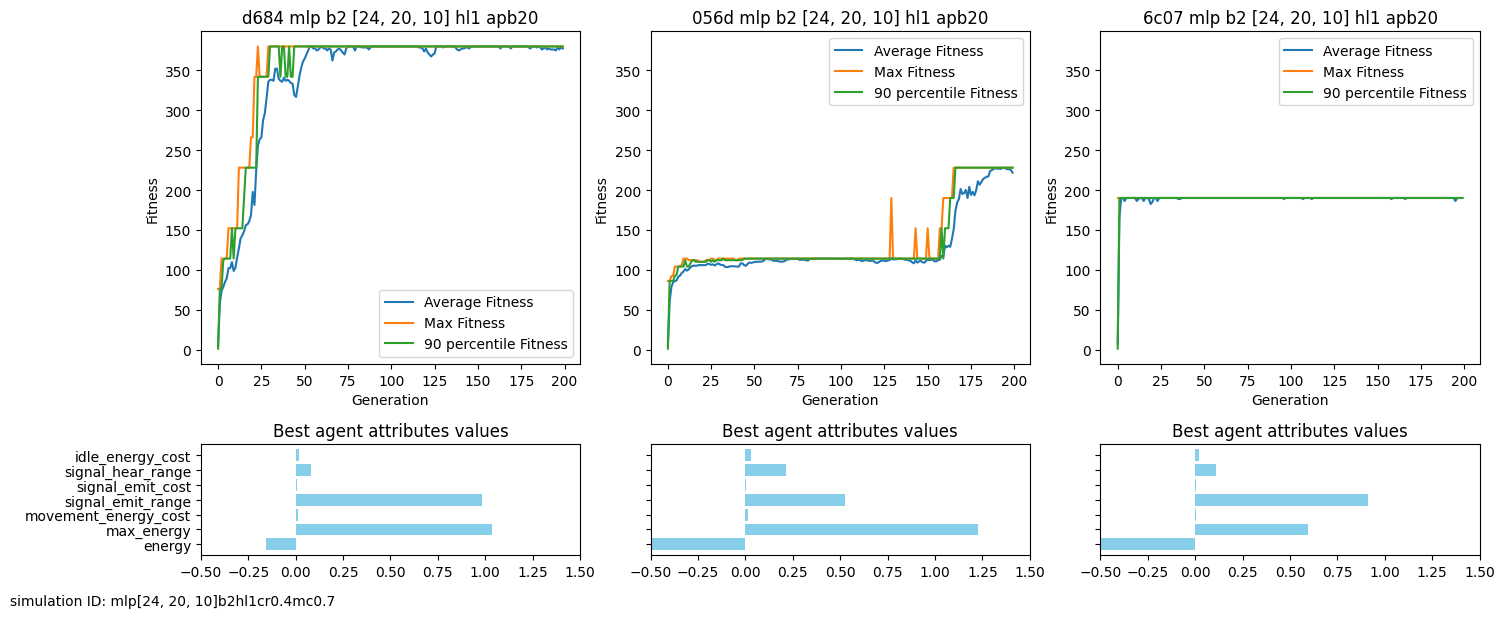

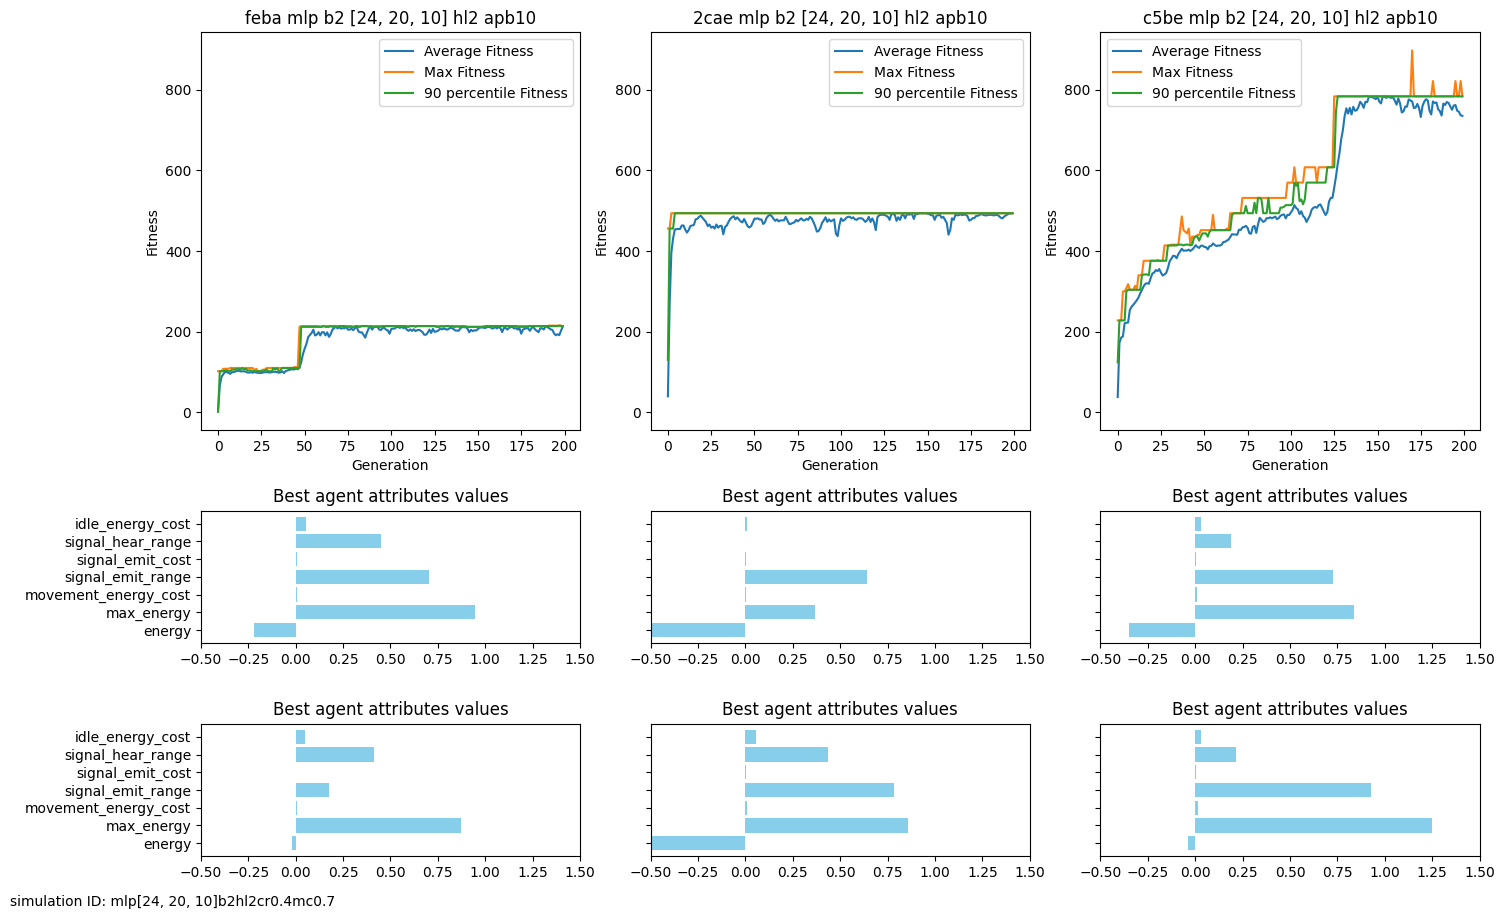

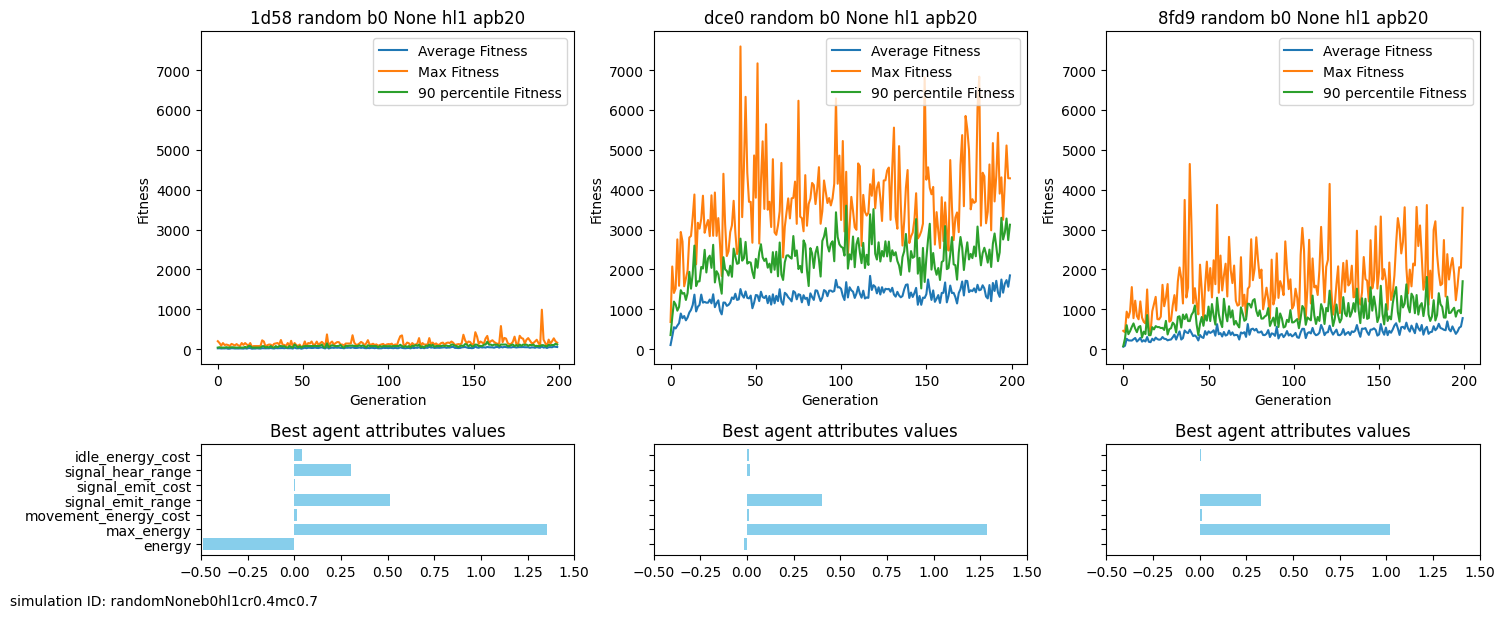

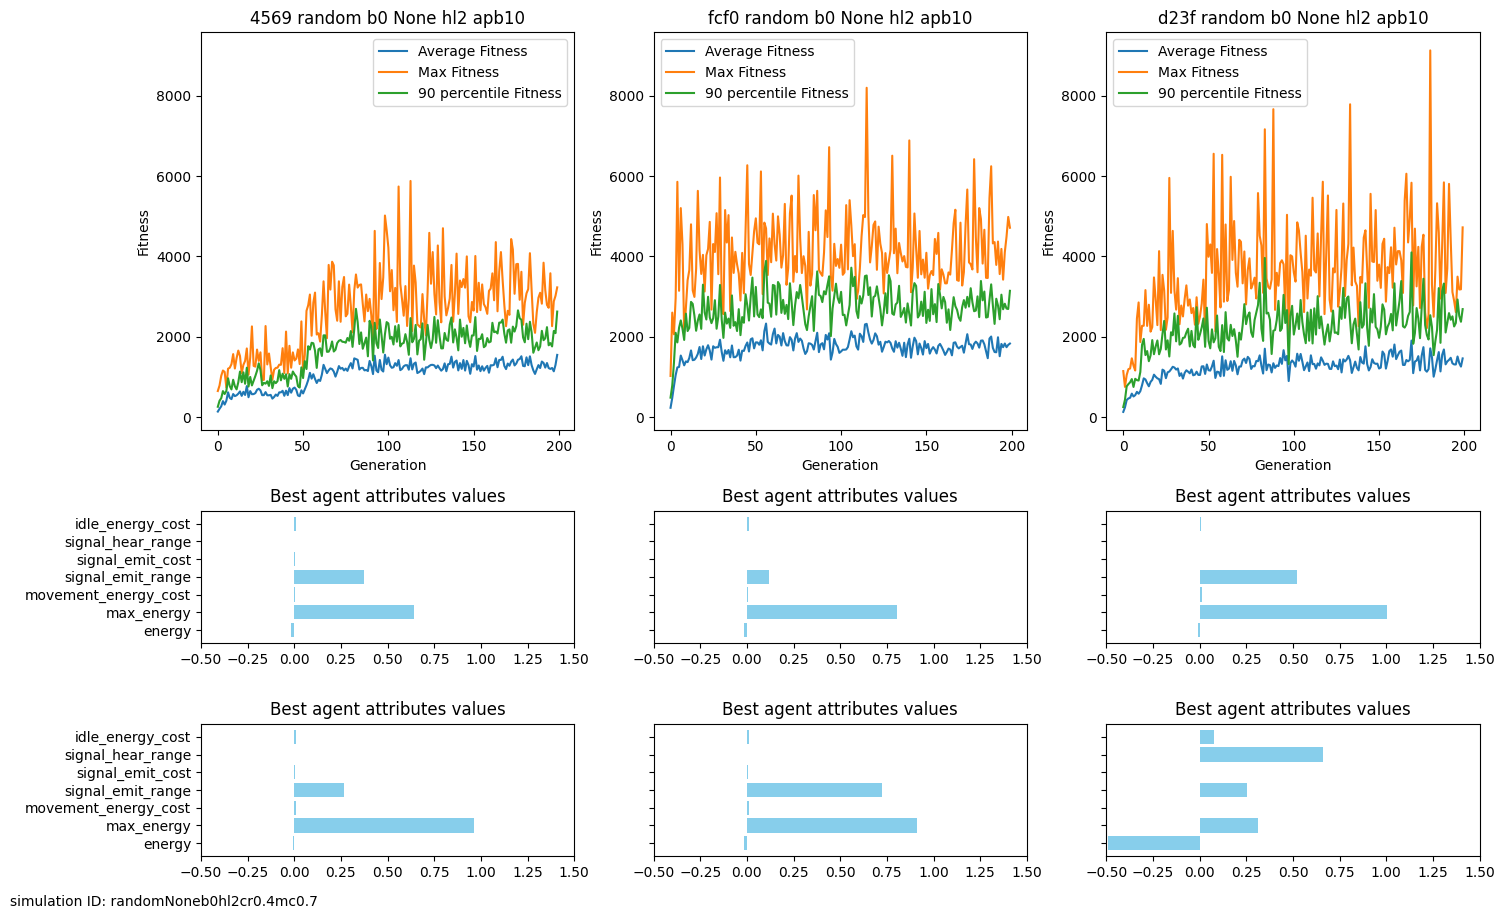

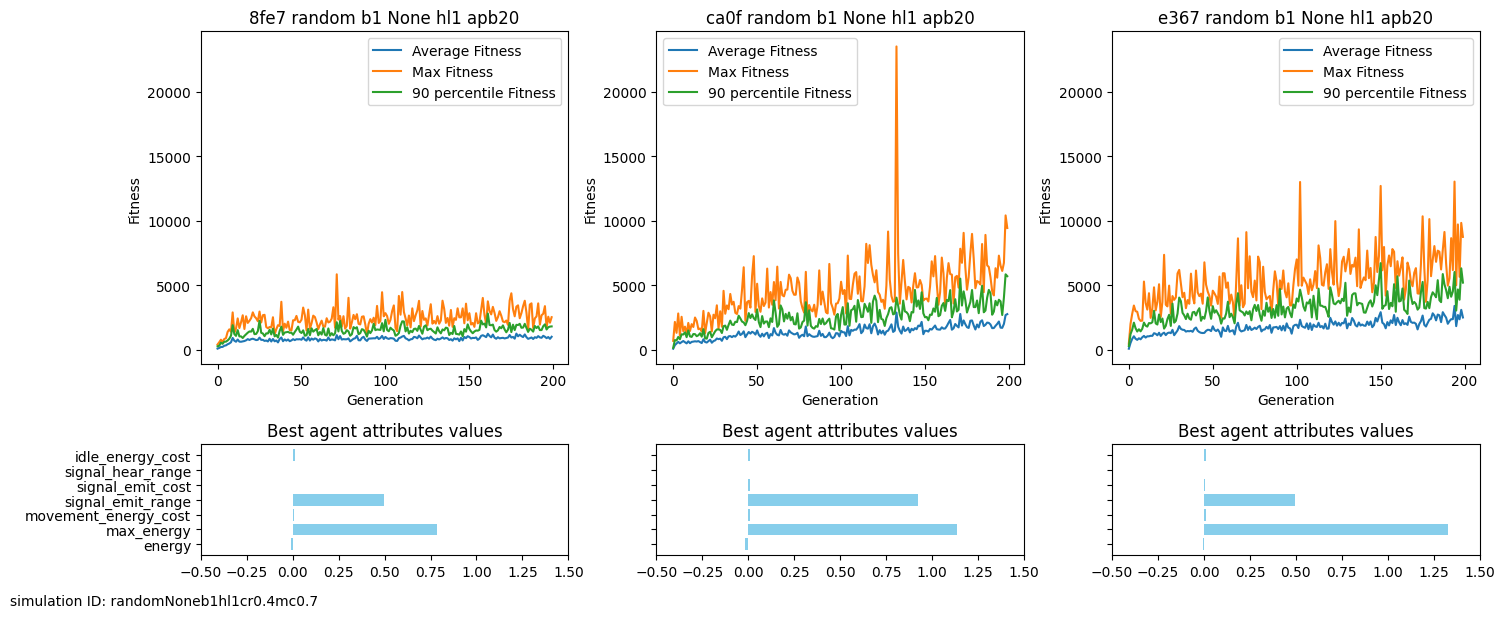

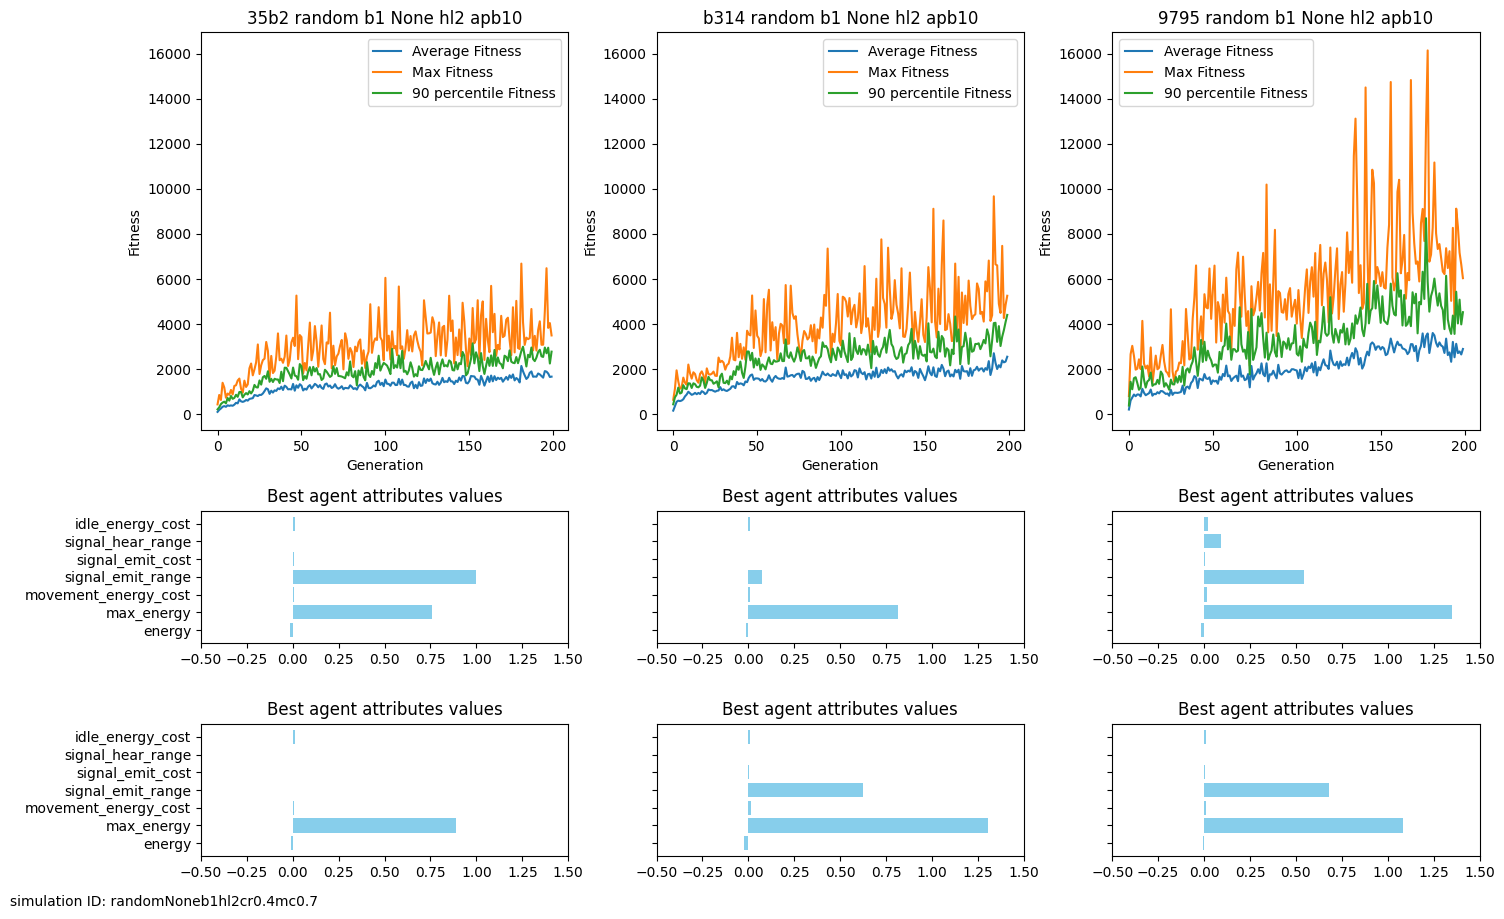

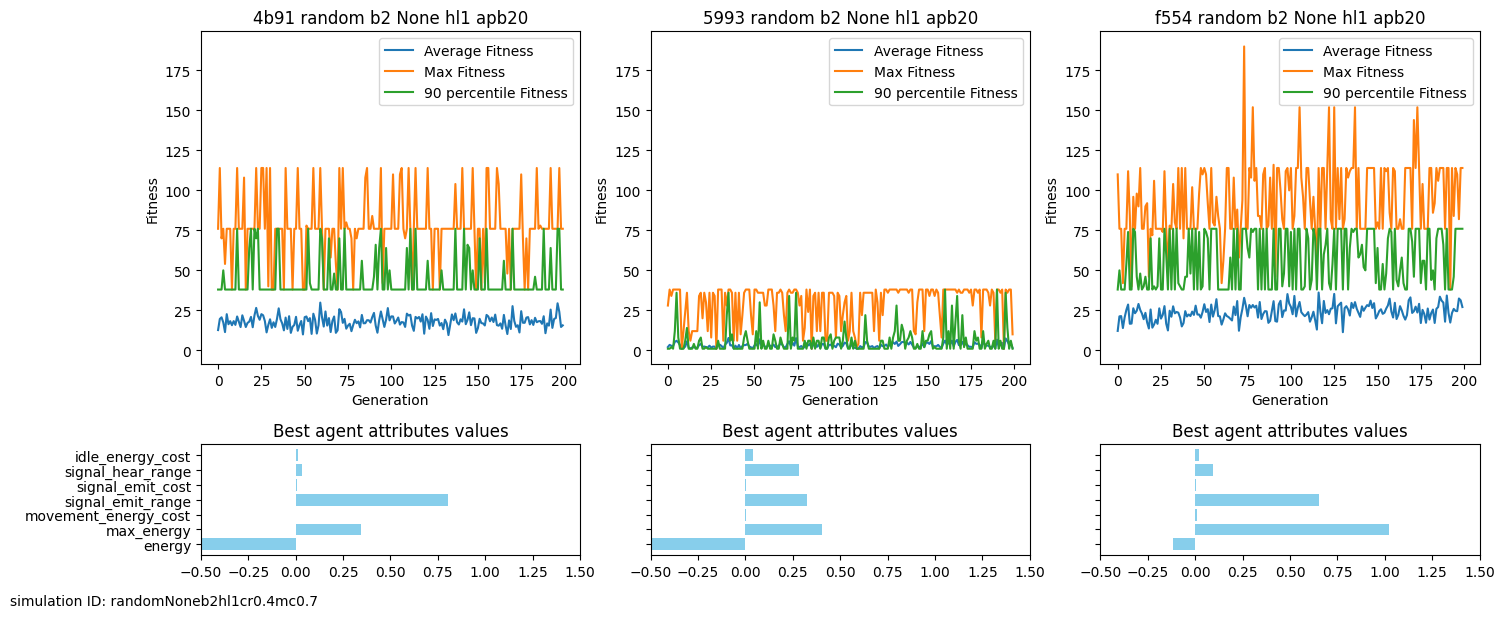

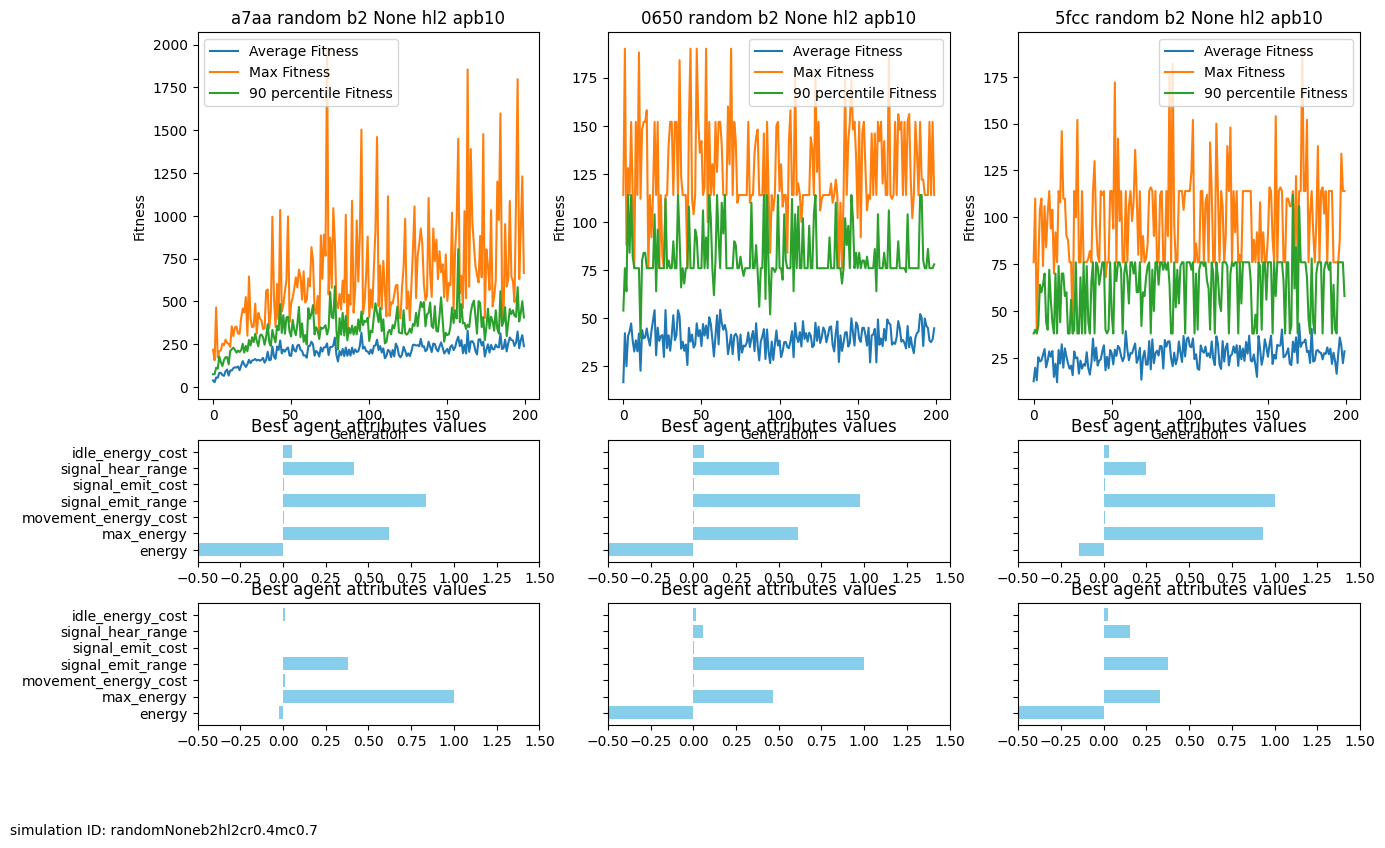

In [4]:
import matplotlib.pyplot as plt
'''
simulation_data = {
        "id": str(uuid.uuid4()),
        "start_time": int(time.time()),
        "end_time": int(time.time()),

        "research": {
            "grid_image_path": grid_image_path,
            "brain_type": str(brain_type),
            "brain_setup": brain_setup,
            "hierarchy_levels": hierarchy_levels,
            "agents_per_brain_num": agents_per_brain_num, 
        },

        "evolution": {
            "iterations": iterations,
            "population_size": population_size,
            "crossover_chance": crossover_chance,
            "mutation_chance": mutation_chance,
        },

        "evaluation": {
            "max_iterations": max_iterations,
            "render_mode": render_mode,
            "seed": seed
        }
    }'''
simulations.sort(key=lambda x: (\
    x["data"]["research"]["brain_type"],\
    x["data"]["research"]["brain_setup"],\
    x["data"]["research"]["grid_image_path"],\
    x["data"]["research"]["hierarchy_levels"],\
    x["data"]["start_time"],\
    x["data"]["evolution"]["crossover_chance"],\
    x["data"]["evolution"]["mutation_chance"],\
))
last_uid = None
current_figure, current_axis = None, None
current_index = 0
for simulation in simulations:
    # uid from sort method to identify simulation
    uid =  simulation["data"]["research"]["brain_type"]\
        + str(simulation["data"]["research"]["brain_setup"]) \
        + "b"+simulation["data"]["research"]["grid_image_path"][-5:-4] \
        + "hl"+str(simulation["data"]["research"]["hierarchy_levels"]) \
        + "cr"+str(simulation["data"]["evolution"]["crossover_chance"]) \
        + "mc"+str(simulation["data"]["evolution"]["mutation_chance"])

    best_specimen = None
    average_fitnesses = []
    max_fitnesses = []
    percentile_90th_fitnesses = []
    # print(simulation["generations"]["population_with_fitness"])
    
    for generation in simulation["generations"]:
        average_fitness = 0
        max_fitness = 0
        fitensses = []
        for solution in generation["population_with_fitness"]:
            brains, agents, fitness = solution
            average_fitness += fitness
            max_fitness = max(max_fitness, fitness)
            fitensses.append(fitness)
        fitensses.sort(reverse=True)
        fitnesses = fitensses[int(len(fitensses) * 0.1):]
        percentile_90th_fitnesses.append(fitnesses[0])

        average_fitness /= len(generation["population_with_fitness"])
        average_fitnesses.append(average_fitness)
        max_fitnesses.append(max_fitness)

    best_solution = None
    best_fitness = 0
    for solution in simulation["generations"][-1]["population_with_fitness"]:
        brains, agents, fitness = solution
        if fitness > best_fitness:
            best_fitness = fitness
            best_solution = solution
    
    '''
    agent = {
            'energy': self.energy,
            'max_energy': self.max_energy,
            'movement_energy_cost': self.movement_energy_cost,
            'signal_emit_range': self.signal_emit_range,
            'signal_emit_cost': self.signal_emit_cost,
            'signal_hear_range': self.signal_hear_range,
            'idle_energy_cost': self.idle_energy_cost
        }
    '''
    # current_figure, current_axis = plt.subplots(2,3)
    if last_uid != uid:
        if current_figure != None:
            print(uid)
            for i in range(2):
                current_axis[0,i].sharey(current_axis[0,i+1])
            current_figure.tight_layout()
        rows = simulation["data"]["research"]["hierarchy_levels"]+1
        current_figure, current_axis = plt.subplots(rows,3, figsize=(15, rows*3), gridspec_kw={'height_ratios': [3,*[1]*(rows-1)]})
        current_figure.text(0, 0, "simulation ID: "+uid, ha='left', va='top', fontsize=10)
        current_index = 0
        last_uid = uid
    else:
        current_index += 1
    
    for (i,agent) in enumerate(best_solution[1]):
        current_axis[i+1,current_index].barh(list(agent.keys()), list(agent.values()), color='skyblue')
        current_axis[i+1,current_index].set_xlim(-0.5, 1.5)
        current_axis[i+1,current_index].set_title('Best agent attributes values')
        if current_index > 0:
            current_axis[i+1,current_index].set_yticklabels([])

    # current_axis[0,current_index].set_figure(figsize=(3, 1))
    current_axis[0,current_index].plot(average_fitnesses)
    current_axis[0,current_index].plot(max_fitnesses)
    current_axis[0,current_index].plot(percentile_90th_fitnesses)
    current_axis[0,current_index].set_title(simulation["data"]["id"][:4]\
               + " " + simulation["data"]["research"]["brain_type"]\
               + " b" + (simulation["data"]["research"]["grid_image_path"])[-5:-4]\
               + " " + str(simulation["data"]["research"]["brain_setup"])\
               + " hl" + str(simulation["data"]["research"]["hierarchy_levels"])\
               + " apb" + str(simulation["data"]["research"]["agents_per_brain_num"])\
            )
    current_axis[0,current_index].set_xlabel("Generation")
    current_axis[0,current_index].set_ylabel("Fitness")
    current_axis[0,current_index].legend(["Average Fitness", "Max Fitness", "90 percentile Fitness"])

In [21]:
table_data = {
    "0": [],
    "1": [],
    "2": [],
}
for simulation in simulations:
    best_solution = None
    best_fitness = -10
    for solution in simulation["generations"][-1]["population_with_fitness"]:
        brains, agents, fitness = solution
        if fitness > best_fitness:
            best_fitness = fitness
            best_solution = solution
    grid = simulation["data"]["research"]["grid_image_path"][-5:-4]
    table_data[grid].append((simulation["data"]["research"]["brain_type"], simulation["data"]["research"]["brain_setup"], best_solution, best_fitness))

In [25]:
from tabulate import tabulate

columns = ["grid", "brain_type", "average_fitness"]
data = []

for grid in table_data:
    mlp, mlp_num = 0, 0
    random, random_num = 0, 0
    table_data[grid].sort(key=lambda x: x[3], reverse=True)
    
    for (brain_type, brain_setup, best_solution, best_fitness) in table_data[grid]:
        if brain_type == "mlp":
            mlp += best_fitness
            mlp_num += 1
        else:
            random += best_fitness
            random_num += 1
    data.append([grid, "mlp", mlp//mlp_num, "random", random//random_num])

latex_table = tabulate(data, columns, tablefmt="latex")
print(latex_table)

\begin{tabular}{rlrlr}
\hline
    &     &   grid & brain\_type   &   average\_fitness \\
\hline
  0 & mlp &   2733 & random       &              3443 \\
  1 & mlp &   9245 & random       &              5912 \\
  2 & mlp &    619 & random       &               182 \\
\hline
\end{tabular}


In [52]:
from tabulate import tabulate

columns = []
data = []

for grid in table_data:
    runs = {}
    for (brain_type, brain_setup, best_solution, best_fitness) in table_data[grid]:
        if brain_type == "mlp":
            if str(brain_setup) not in runs:
                runs[str(brain_setup)] = []
            runs[str(brain_setup)].append(best_fitness)
    for brain_setup in runs:
        runs[brain_setup] = int(sum(runs[str(brain_setup)]) / len(runs[str(brain_setup)]))

    fitnesses = []
    for brain_setup in runs:
        if grid == '0':
            columns.append(str(brain_setup))
    columns.sort()
    for column in columns:
        fitnesses.append(runs[column])
    data.append([grid, *fitnesses])
columns = ["mlp"+x for x in columns]
latex_table = tabulate(data, ["grid", *columns], tablefmt="latex")
print(latex_table)

\begin{tabular}{rrrrr}
\hline
   grid &   mlp[24, 10, 10] &   mlp[24, 20, 10] &   mlp[24, 5, 10] &   mlp[24, 7, 3, 10] \\
\hline
      0 &              3538 &              4032 &             2308 &                1055 \\
      1 &              6261 &             10320 &            14749 &                5649 \\
      2 &               441 &               381 &              489 &                1164 \\
\hline
\end{tabular}


In [55]:
from pprint import pprint as pp


data = {
    "0": [[],[]],
    "1": [[],[]],
    "2": [[],[]],
}
for simulation in simulations:
    best_solution = None
    best_fitness = -10
    for solution in simulation["generations"][-1]["population_with_fitness"]:
        brains, agents, fitness = solution
        if fitness > best_fitness:
            best_fitness = fitness
            best_solution = solution
    grid = simulation["data"]["research"]["grid_image_path"][-5:-4]
    hierarchy_levels = simulation["data"]["research"]["hierarchy_levels"]
    data[grid][hierarchy_levels-1].append(best_fitness)
for grid in data:
    for i in range(2):
        data[grid][i] = int(sum(data[grid][i]) / len(data[grid][i]))
pp(data)

columns = ["plansza", "jednolita grupa", "podział na 2 grupy"]
rows = []
for grid in data:
    rows.append([grid, *data[grid]])
latex_table = tabulate(rows, columns, tablefmt="latex")
print(latex_table)

{'0': [1725, 4026], '1': [9481, 7676], '2': [262, 801]}
\begin{tabular}{rrr}
\hline
   plansza &   jednolita grupa &   podział na 2 grupy \\
\hline
         0 &              1725 &                 4026 \\
         1 &              9481 &                 7676 \\
         2 &               262 &                  801 \\
\hline
\end{tabular}
